# Machine-learning analysis - Balanced dataset - Only TNBC - Only Clusters - p0.05

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

import sklearn
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import shap
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

In [2]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data_definitivo")

In [3]:
# load the occurrence matrix 
occurrence_matrix_TNandNONTN_relgenes_p005 = pd.read_csv('Occurrence_Matrix_onlyTN_pval005_withLabels_VARIANTCLASS_afterMutCLust_ONLYclusters_definitivo.csv', sep=None, engine='python')

# Set the first column as row indices
occurrence_matrix_TNandNONTN_relgenes_p005 = occurrence_matrix_TNandNONTN_relgenes_p005.set_index(occurrence_matrix_TNandNONTN_relgenes_p005.iloc[:, 0])
# Remove the name of the index column
occurrence_matrix_TNandNONTN_relgenes_p005 = occurrence_matrix_TNandNONTN_relgenes_p005.rename_axis(None, axis='index')
# Drop the first column from the DataFrame
occurrence_matrix_TNandNONTN_relgenes_p005 = occurrence_matrix_TNandNONTN_relgenes_p005.iloc[:, 1:]

occurrence_matrix_TNandNONTN_relgenes_p005

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PIK3CA_Nonsense_Mutation_418_420,PIK3CA_In_Frame_Ins_102_113,CTCF_In_Frame_Ins_283_288,ZKSCAN1_Frame_Shift_Ins_270_270,USP8_Frame_Shift_Del_523_523,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,Target
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_010,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_013,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_014,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_p1CQTdIg,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
MBCProject_qQSACYuv,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
occurrence_matrix_TNandNONTN_relgenes_p005.sum().sum()

962

In [5]:
columns_with_all_zeros = (occurrence_matrix_TNandNONTN_relgenes_p005 == 0).all().sum()
columns_with_all_zeros

0

In [6]:
(occurrence_matrix_TNandNONTN_relgenes_p005 == 0).all().sum()

0

There are no rows and no columns with all zero values.

### Check if there are patients with no features (zero rows) and mutations not present in any patient (zero columns)

In [7]:
patient_target = occurrence_matrix_TNandNONTN_relgenes_p005[['Target']]
patient_target

,Target
brca_smc_2018_BB01_004,1
brca_smc_2018_BB01_005,0
brca_smc_2018_BB01_010,0
brca_smc_2018_BB01_013,0
brca_smc_2018_BB01_014,0
...,...
MBCProject_p1CQTdIg,0
MBCProject_pktAIxFb,0
MBCProject_qQSACYuv,0
MBCProject_rJHBiKTl,1


In [8]:
occurrence_matrix_without_target = occurrence_matrix_TNandNONTN_relgenes_p005.drop('Target', axis=1)
occurrence_matrix_without_target

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,NOTCH2_Frame_Shift_Ins_2297_2303,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PIK3CA_Nonsense_Mutation_418_420,PIK3CA_In_Frame_Ins_102_113,CTCF_In_Frame_Ins_283_288,ZKSCAN1_Frame_Shift_Ins_270_270,USP8_Frame_Shift_Del_523_523,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_010,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_013,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_014,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_p1CQTdIg,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
MBCProject_qQSACYuv,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
zero_rows = occurrence_matrix_without_target[(occurrence_matrix_without_target == 0).all(axis=1)]
zero_rows

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,NOTCH2_Frame_Shift_Ins_2297_2303,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PIK3CA_Nonsense_Mutation_418_420,PIK3CA_In_Frame_Ins_102_113,CTCF_In_Frame_Ins_283_288,ZKSCAN1_Frame_Shift_Ins_270_270,USP8_Frame_Shift_Del_523_523,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26


There aren't patients with zero mutations.

In [10]:
# separate the class 0 (non TN) from the class 1 (TN)

# class count
class_count_0, class_count_1 = occurrence_matrix_TNandNONTN_relgenes_p005['Target'].value_counts()

In [11]:
class_count_0

559

In [12]:
class_count_1

140

In [13]:
# Separate class
class_0 = occurrence_matrix_TNandNONTN_relgenes_p005[occurrence_matrix_TNandNONTN_relgenes_p005['Target'] == 0]
class_1 = occurrence_matrix_TNandNONTN_relgenes_p005[occurrence_matrix_TNandNONTN_relgenes_p005['Target'] == 1] # print the shape of the class
print('Target 0 - Non TN:', class_0.shape)
print('Target 1 - TN:', class_1.shape)

Target 0 - Non TN: (559, 47)
Target 1 - TN: (140, 47)


In [14]:
# Non Triple-Negative patients (the patients without mutations in the considered genes have been dropped out) 
class_0

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PIK3CA_Nonsense_Mutation_418_420,PIK3CA_In_Frame_Ins_102_113,CTCF_In_Frame_Ins_283_288,ZKSCAN1_Frame_Shift_Ins_270_270,USP8_Frame_Shift_Del_523_523,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,Target
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_010,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_013,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_014,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_016,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_oeubIAFD,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_p1CQTdIg,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
MBCProject_qQSACYuv,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Triple-Negative patients 
class_1

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PIK3CA_Nonsense_Mutation_418_420,PIK3CA_In_Frame_Ins_102_113,CTCF_In_Frame_Ins_283_288,ZKSCAN1_Frame_Shift_Ins_270_270,USP8_Frame_Shift_Del_523_523,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,Target
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_037,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_041,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_059,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_067,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_d5CbUNTb,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_epUYsdCE,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_oqupfDu7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


##  Random Under-Sampling to balance the two classes

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out. But a drawback to undersampling is that we are removing information that may be valuable.

In [16]:
class_0_under = class_0.sample(class_count_1, random_state=123) # used for random sampling 
class_0_under

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PIK3CA_Nonsense_Mutation_418_420,PIK3CA_In_Frame_Ins_102_113,CTCF_In_Frame_Ins_283_288,ZKSCAN1_Frame_Shift_Ins_270_270,USP8_Frame_Shift_Del_523_523,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,Target
TCGA-BH-A0BQ,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BR-V-060,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A8-A093,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A8-A08O,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-B6-A0RS,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-AN-A0FV,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AR-A1AO,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-E9-A1R0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_130,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


total class of 1 and 0: Target
0    140
1    140
Name: count, dtype: int64


<Axes: title={'center': 'Count (target) - Balanced dataset - Total TN and non TN genes'}, xlabel='Target'>

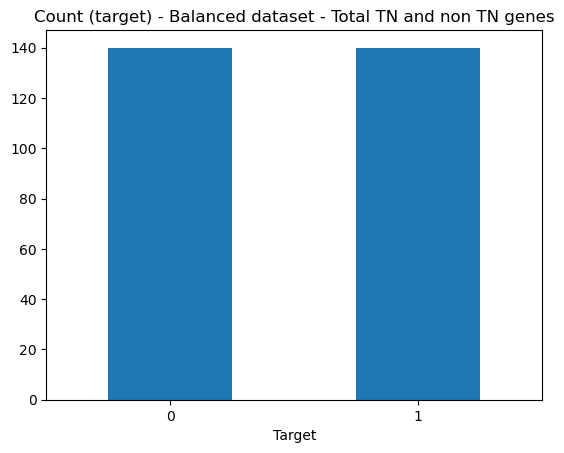

In [17]:
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:",occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED['Target'].value_counts())# plot the count after under-sampling
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED['Target'].value_counts().plot(kind='bar', title='Count (target) - Balanced dataset - Total TN and non TN genes', rot=360)

In [18]:
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PIK3CA_Nonsense_Mutation_418_420,PIK3CA_In_Frame_Ins_102_113,CTCF_In_Frame_Ins_283_288,ZKSCAN1_Frame_Shift_Ins_270_270,USP8_Frame_Shift_Del_523_523,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,Target
TCGA-BH-A0BQ,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BR-V-060,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A8-A093,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A8-A08O,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-B6-A0RS,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_d5CbUNTb,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_epUYsdCE,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_oqupfDu7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [19]:
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.sum(axis=0)

TP53_Missense_Mutation_270_282         43
MAML3_In_Frame_Ins_503_503              5
PIK3CA_Missense_Mutation_1046_1047     64
TP53_Missense_Mutation_173_177         24
TP53_Missense_Mutation_236_258         41
PIK3CA_Missense_Mutation_545_546       26
TP53_Nonsense_Mutation_191_199         10
PIK3CA_Missense_Mutation_541_542       15
PIK3CA_Missense_Mutation_345_345       16
AKT1_Missense_Mutation_17_17           10
PIK3CA_Missense_Mutation_418_420        0
TMPRSS13_Missense_Mutation_77_83        4
TP53_Missense_Mutation_191_199         18
PIK3CA_Missense_Mutation_102_113        4
TP53_Frame_Shift_Del_236_258            3
CTCF_Missense_Mutation_283_288          1
TP53_Frame_Shift_Del_191_199            1
PIK3CA_In_Frame_Del_102_113             5
TP53_In_Frame_Del_191_199               1
PIK3CA_In_Frame_Del_418_420             0
TP53_Silent_270_282                     1
MTMR12_Missense_Mutation_520_521        3
NOTCH2_Frame_Shift_Del_2297_2303        4
TP53_Nonsense_Mutation_236_258    

In [20]:
# check if there are zero rows
(occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.drop('Target', axis=1) == 0).all(axis=1).any()

False

There are not zero rows not considering the Target column: all patients have a mutation in at least one significant gene.

In [21]:
columns_with_all_zero = (occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED == 0).all()
columns_with_all_zero

TP53_Missense_Mutation_270_282        False
MAML3_In_Frame_Ins_503_503            False
PIK3CA_Missense_Mutation_1046_1047    False
TP53_Missense_Mutation_173_177        False
TP53_Missense_Mutation_236_258        False
PIK3CA_Missense_Mutation_545_546      False
TP53_Nonsense_Mutation_191_199        False
PIK3CA_Missense_Mutation_541_542      False
PIK3CA_Missense_Mutation_345_345      False
AKT1_Missense_Mutation_17_17          False
PIK3CA_Missense_Mutation_418_420       True
TMPRSS13_Missense_Mutation_77_83      False
TP53_Missense_Mutation_191_199        False
PIK3CA_Missense_Mutation_102_113      False
TP53_Frame_Shift_Del_236_258          False
CTCF_Missense_Mutation_283_288        False
TP53_Frame_Shift_Del_191_199          False
PIK3CA_In_Frame_Del_102_113           False
TP53_In_Frame_Del_191_199             False
PIK3CA_In_Frame_Del_418_420            True
TP53_Silent_270_282                   False
MTMR12_Missense_Mutation_520_521      False
NOTCH2_Frame_Shift_Del_2297_2303

In [22]:
# check if there are zero columns
(occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED == 0).all().sum()

7

There are 7 columns containing all zero values.

In [23]:
columns_to_drop = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.columns[occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.eq(0).all()]
columns_to_drop

Index(['PIK3CA_Missense_Mutation_418_420', 'PIK3CA_In_Frame_Del_418_420',
       'PIK3CA_Silent_1046_1047', 'NOTCH2_Frame_Shift_Ins_2297_2303',
       'PIK3CA_Nonsense_Mutation_418_420', 'PIK3CA_In_Frame_Ins_102_113',
       'CTCF_In_Frame_Ins_283_288'],
      dtype='object')

In [24]:
# drop from the dataframe the columns containing all zeros
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.drop(columns_to_drop, axis=1)
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,TP53_Nonsense_Mutation_173_177,MTMR12_Silent_520_521,PIK3CA_Silent_541_542,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,ZKSCAN1_Frame_Shift_Ins_270_270,USP8_Frame_Shift_Del_523_523,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,Target
TCGA-BH-A0BQ,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BR-V-060,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A8-A093,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A8-A08O,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-B6-A0RS,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_d5CbUNTb,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_epUYsdCE,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_oqupfDu7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [25]:
# save the BALANCED dataset
#os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data")
#occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.to_csv('Occurrence_Matrix_TNandNONTNrelgenes_pval005_withLabels_BALANCED_VARIANTCLASS_afterMutClust_onlyClusters.txt', index=True, sep='\t')

# Preparation of training and test set and range normalization

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import shap

In [27]:
# remove the Target column to the occurrence matrix
X = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.drop('Target', axis=1)
X 

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,TP53_Silent_236_258,TP53_Nonsense_Mutation_173_177,MTMR12_Silent_520_521,PIK3CA_Silent_541_542,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,ZKSCAN1_Frame_Shift_Ins_270_270,USP8_Frame_Shift_Del_523_523,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26
TCGA-BH-A0BQ,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BR-V-060,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A8-A093,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A8-A08O,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-B6-A0RS,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_d5CbUNTb,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_epUYsdCE,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_oqupfDu7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
# sum each column
X.sum(axis=0)

TP53_Missense_Mutation_270_282        43
MAML3_In_Frame_Ins_503_503             5
PIK3CA_Missense_Mutation_1046_1047    64
TP53_Missense_Mutation_173_177        24
TP53_Missense_Mutation_236_258        41
PIK3CA_Missense_Mutation_545_546      26
TP53_Nonsense_Mutation_191_199        10
PIK3CA_Missense_Mutation_541_542      15
PIK3CA_Missense_Mutation_345_345      16
AKT1_Missense_Mutation_17_17          10
TMPRSS13_Missense_Mutation_77_83       4
TP53_Missense_Mutation_191_199        18
PIK3CA_Missense_Mutation_102_113       4
TP53_Frame_Shift_Del_236_258           3
CTCF_Missense_Mutation_283_288         1
TP53_Frame_Shift_Del_191_199           1
PIK3CA_In_Frame_Del_102_113            5
TP53_In_Frame_Del_191_199              1
TP53_Silent_270_282                    1
MTMR12_Missense_Mutation_520_521       3
NOTCH2_Frame_Shift_Del_2297_2303       4
TP53_Nonsense_Mutation_236_258         1
TP53_In_Frame_Del_173_177              1
TP53_Frame_Shift_Del_270_282           1
PIK3R1_In_Frame_

In [29]:
# select and store the Target column
y = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED['Target']
y

TCGA-BH-A0BQ           0
BR-V-060               0
TCGA-A8-A093           0
TCGA-A8-A08O           0
TCGA-B6-A0RS           0
                      ..
MBCProject_d5CbUNTb    1
MBCProject_epUYsdCE    1
MBCProject_lQtMtjFR    1
MBCProject_oqupfDu7    1
MBCProject_rJHBiKTl    1
Name: Target, Length: 280, dtype: int64

In [30]:
# Split dei dati in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=123)

In [31]:
X_train

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,TP53_Silent_236_258,TP53_Nonsense_Mutation_173_177,MTMR12_Silent_520_521,PIK3CA_Silent_541_542,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,ZKSCAN1_Frame_Shift_Ins_270_270,USP8_Frame_Shift_Del_523_523,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26
TCGA-A7-A0D9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A12Y,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A8-A094,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR106,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-E2-A10B,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-BH-A0EB,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-B6-A0RE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4844a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X01BR031,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
X_train.columns[(X_train == 0).all(axis=0)]

Index([], dtype='object')

In [33]:
len(X_train.columns[(X_train == 0).all(axis=0)])

0

There is 1 column in the training dataset with just 0 values. 

In [34]:
X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,TP53_Silent_236_258,TP53_Nonsense_Mutation_173_177,MTMR12_Silent_520_521,PIK3CA_Silent_541_542,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,ZKSCAN1_Frame_Shift_Ins_270_270,USP8_Frame_Shift_Del_523_523,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26
TCGA-B6-A401,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-B6-A0X5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0D0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0CL,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-D8-A142,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
brca_smc_2018_BR371,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_017,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A7-A0DB,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_126,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
X_test.columns[(X_test == 0).all(axis=0)]

Index(['MAML3_In_Frame_Ins_503_503', 'CTCF_Missense_Mutation_283_288',
       'TP53_Frame_Shift_Del_191_199', 'TP53_In_Frame_Del_191_199',
       'TP53_Silent_270_282', 'NOTCH2_Frame_Shift_Del_2297_2303',
       'TP53_Nonsense_Mutation_236_258', 'TP53_In_Frame_Del_173_177',
       'TP53_Frame_Shift_Del_270_282', 'PIK3R1_In_Frame_Ins_566_578',
       'TP53_Frame_Shift_Del_173_177', 'PIK3R1_In_Frame_Del_566_578',
       'TP53_Nonsense_Mutation_270_282', 'TP53_Silent_236_258',
       'TP53_Nonsense_Mutation_173_177', 'MTMR12_Silent_520_521',
       'PIK3CA_Silent_541_542', 'TP53_Frame_Shift_Ins_270_282',
       'TP53_Silent_191_199', 'ZNF195_Missense_Mutation_109_111',
       'MYL10_Splice_Region_26_26'],
      dtype='object')

In [36]:
len(X_test.columns[(X_test == 0).all(axis=0)])

21

There are 21 columns in the test dataset with just zero values.

In [37]:
y_train.value_counts()

Target
0    105
1    105
Name: count, dtype: int64

In [38]:
y_test.value_counts()

Target
0    35
1    35
Name: count, dtype: int64

In [39]:
# range-normalization on the training set 
def range_norm_training(x):
    return (x - x.min()) / (x.max() - x.min())

In [40]:
# apply this normalization column-wise to the training 
normalized_X_train = X_train.apply(range_norm_training, axis=0)
normalized_X_train

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,TP53_Silent_236_258,TP53_Nonsense_Mutation_173_177,MTMR12_Silent_520_521,PIK3CA_Silent_541_542,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,ZKSCAN1_Frame_Shift_Ins_270_270,USP8_Frame_Shift_Del_523_523,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26
TCGA-A7-A0D9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-C8-A12Y,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-A8-A094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR106,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-E2-A10B,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-BH-A0EB,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-B6-A0RE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PD4844a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X01BR031,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# check the columns containing just Nan Values 
normalized_X_train.isna().all(axis=0).sum()

0

1 column contain NaN values, that are the columns with all zero values in the training set.

In [42]:
np.isinf(normalized_X_train).any().any()

False

In [43]:
# replace the NaN values with zero 
normalized_X_train = normalized_X_train.fillna(0)
normalized_X_train

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,TP53_Silent_236_258,TP53_Nonsense_Mutation_173_177,MTMR12_Silent_520_521,PIK3CA_Silent_541_542,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,ZKSCAN1_Frame_Shift_Ins_270_270,USP8_Frame_Shift_Del_523_523,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26
TCGA-A7-A0D9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-C8-A12Y,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-A8-A094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR106,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-E2-A10B,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-BH-A0EB,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-B6-A0RE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PD4844a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X01BR031,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
normalized_X_train.isna().any().any()

False

In [45]:
normalized_X_train.sum(axis=0)

TP53_Missense_Mutation_270_282        33.0
MAML3_In_Frame_Ins_503_503             5.0
PIK3CA_Missense_Mutation_1046_1047    47.0
TP53_Missense_Mutation_173_177        14.0
TP53_Missense_Mutation_236_258        17.0
PIK3CA_Missense_Mutation_545_546      21.0
TP53_Nonsense_Mutation_191_199         7.0
PIK3CA_Missense_Mutation_541_542       6.0
PIK3CA_Missense_Mutation_345_345       8.0
AKT1_Missense_Mutation_17_17           7.0
TMPRSS13_Missense_Mutation_77_83       2.0
TP53_Missense_Mutation_191_199        15.0
PIK3CA_Missense_Mutation_102_113       3.0
TP53_Frame_Shift_Del_236_258           2.0
CTCF_Missense_Mutation_283_288         1.0
TP53_Frame_Shift_Del_191_199           1.0
PIK3CA_In_Frame_Del_102_113            4.0
TP53_In_Frame_Del_191_199              1.0
TP53_Silent_270_282                    1.0
MTMR12_Missense_Mutation_520_521       1.0
NOTCH2_Frame_Shift_Del_2297_2303       4.0
TP53_Nonsense_Mutation_236_258         1.0
TP53_In_Frame_Del_173_177              1.0
TP53_Frame_

In [46]:
normalized_X_train.sum(axis=0).sum()

233.0

In [47]:
# define a function to perform range normalization on the test set based on the values of the training set 
def range_norm_test(train_set, test_set):
    #compute the minimum and the maximum values for each column in the training 
    min_value = train_set.min(axis=0)
    max_value = train_set.max(axis=0)
    # Apply range normalization to the test set based on the min and the max of the training set 
    normalized_test_set = (test_set - min_value) / (max_value - min_value)
    
    return normalized_test_set

# NOTE: it is not necessary to check if the minimum of the test is > than the minimum of the training, since the minimum values in each column both for the test and for the training are zeros

In [48]:
normalized_X_test = range_norm_test(X_train, X_test)
normalized_X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,TP53_Silent_236_258,TP53_Nonsense_Mutation_173_177,MTMR12_Silent_520_521,PIK3CA_Silent_541_542,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,ZKSCAN1_Frame_Shift_Ins_270_270,USP8_Frame_Shift_Del_523_523,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26
TCGA-B6-A401,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-B6-A0X5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-A2-A0D0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-A2-A0CL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-D8-A142,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
brca_smc_2018_BR371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_017,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-A7-A0DB,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_126,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
np.isinf(normalized_X_test).any().any()

False

In [50]:
# check the columns containing just Nan Values 
normalized_X_test.isna().all(axis=0).sum()

0

In [51]:
# check how many columns contain all infinite values 
np.isinf(normalized_X_test).any().sum()

0

1 as the number of zero columns in the training set 

In [52]:
# replace the Infinite values with zero 
normalized_X_test = normalized_X_test.replace([np.inf, -np.inf], 0)
normalized_X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,TP53_Silent_236_258,TP53_Nonsense_Mutation_173_177,MTMR12_Silent_520_521,PIK3CA_Silent_541_542,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,ZKSCAN1_Frame_Shift_Ins_270_270,USP8_Frame_Shift_Del_523_523,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26
TCGA-B6-A401,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-B6-A0X5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-A2-A0D0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-A2-A0CL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-D8-A142,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
brca_smc_2018_BR371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_017,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-A7-A0DB,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_126,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# replace the NaN values with zero 
normalized_X_test = normalized_X_test.fillna(0)
normalized_X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,AKT1_Missense_Mutation_17_17,...,TP53_Silent_236_258,TP53_Nonsense_Mutation_173_177,MTMR12_Silent_520_521,PIK3CA_Silent_541_542,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,ZKSCAN1_Frame_Shift_Ins_270_270,USP8_Frame_Shift_Del_523_523,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26
TCGA-B6-A401,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-B6-A0X5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-A2-A0D0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-A2-A0CL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-D8-A142,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
brca_smc_2018_BR371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_017,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-A7-A0DB,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_126,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
np.isinf(normalized_X_test).any().sum()

0

In [55]:
normalized_X_test.isnull().all(axis=0).sum()

0

### Select the test patients 


In [56]:
# Extract the row indices as a list
test_patient_indices = normalized_X_test.index.tolist()
test_patient_indices

['TCGA-B6-A401',
 'TCGA-B6-A0X5',
 'TCGA-A2-A0D0',
 'TCGA-A2-A0CL',
 'TCGA-D8-A142',
 'brca_smc_2018_BB01_119',
 'TCGA-C8-A27B',
 'MBCProject_oqupfDu7',
 'X21BR002',
 'TCGA-AR-A1AJ',
 'TCGA-D8-A1JJ',
 'X11BR014',
 'MBC_128',
 'MBC_163',
 'MBC_120',
 'brca_smc_2018_BB01_110',
 'TCGA-AC-A6IW',
 'MBCProject_LVSjf8h7',
 'PD4133a',
 'TCGA-A2-A0YI',
 'TCGA-BH-A0BO',
 'MBCProject_d5CbUNTb',
 'TCGA-AO-A03M',
 'MBC_167',
 'TCGA-AO-A03L',
 'TCGA-E2-A14R',
 'MBC_204',
 'X20BR008',
 'TCGA-BH-A0H3',
 'MBC_72',
 'TCGA-B6-A409',
 'TCGA-BH-A0E0',
 'brca_smc_2018_BR145',
 'TCGA-BH-A0BJ',
 'MBC_10',
 'TCGA-A1-A0SI',
 'TCGA-AO-A0J2',
 'X11BR011',
 'TCGA-AR-A24S',
 'TCGA-AR-A0TP',
 'TCGA-E9-A1R0',
 'TCGA-C8-A26V',
 'TCGA-C8-A131',
 'MBC_33',
 'TCGA-D8-A27K',
 'TCGA-AO-A129',
 'X18BR002',
 'TCGA-A2-A0YH',
 'MBC_199',
 'MBC_183',
 'MBC_53',
 'brca_smc_2018_BB01_037',
 'MBCProject_pktAIxFb',
 'TCGA-A8-A093',
 'TCGA-A2-A0EQ',
 'TCGA-B6-A0I1',
 'TCGA-AC-A23E',
 'TCGA-AR-A1AV',
 'TCGA-E2-A14Y',
 'TCGA-D8-A27F',

In [57]:
# Create a new DataFrame with the patient indices
test_patient_df = pd.DataFrame({'Patient': test_patient_indices})
test_patient_df

,Patient
0,TCGA-B6-A401
1,TCGA-B6-A0X5
2,TCGA-A2-A0D0
3,TCGA-A2-A0CL
4,TCGA-D8-A142
...,...
65,brca_smc_2018_BR371
66,brca_smc_2018_BB01_017
67,TCGA-A7-A0DB
68,brca_smc_2018_BB01_126


In [58]:
# save the test patients 
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Test_patients")
test_patient_df.to_csv('Test_TNandNONTNpatients_only_clusters_p_005.txt', index=False, sep='\t')

### Select the training patients 

In [68]:
# Extract the row indices as a list
train_patient_indices = normalized_X_train.index.tolist()
train_patient_indices

['TCGA-A7-A0D9',
 'TCGA-C8-A12Y',
 'TCGA-A8-A094',
 'brca_smc_2018_BR106',
 'TCGA-E2-A10B',
 'TCGA-BH-A0B9',
 'MBCProject_JpCASlSG',
 'MBC_28',
 'TCGA-BH-A0HI',
 'TCGA-EW-A1IY',
 'MBCProject_oeubIAFD',
 'TCGA-A7-A13E',
 'MBC_108',
 'TCGA-BH-A1EU',
 'TCGA-OL-A66L',
 'TCGA-D8-A27M',
 'BR-V-060',
 'TCGA-BH-A5IZ',
 'TCGA-C8-A135',
 'MBC_216',
 'TCGA-AR-A0U4',
 'TCGA-E2-A1IU',
 'TCGA-BH-A1FN',
 'TCGA-C8-A134',
 'TCGA-A7-A0CJ',
 'TCGA-AR-A24Q',
 'TCGA-BH-A0W3',
 'TCGA-A8-A08X',
 'MBC_109',
 'TCGA-E2-A1IN',
 'MBCProject_rvULI3TV',
 'TCGA-BH-A0DX',
 'BR-V-017',
 'MBCProject_AwukckTD',
 'brca_smc_2018_BR089',
 'MBC_182',
 'TCGA-E2-A1AZ',
 'BR-V-015',
 'brca_smc_2018_BR408',
 'TCGA-GM-A2DD',
 'PD4601a',
 'TCGA-A2-A04N',
 'MBC_24',
 'TCGA-C8-A12W',
 'TCGA-A8-A06O',
 'brca_smc_2018_BR164',
 'BR-M-098',
 'TCGA-AQ-A1H2',
 'brca_smc_2018_BR041',
 'X01BR001',
 'TCGA-BH-A0E6',
 'MBCProject_EkHAIECZ',
 'brca_smc_2018_BB01_125',
 'brca_smc_2018_BB01_034',
 'TCGA-A2-A04T',
 'MBCProject_m9SNc1Iq',
 'BR-V-0

In [69]:
# Create a new DataFrame with the patient indices
train_patient_df = pd.DataFrame({'Patient': train_patient_indices})
train_patient_df

,Patient
0,TCGA-A7-A0D9
1,TCGA-C8-A12Y
2,TCGA-A8-A094
3,brca_smc_2018_BR106
4,TCGA-E2-A10B
...,...
205,TCGA-BH-A0EB
206,TCGA-B6-A0RE
207,PD4844a
208,X01BR031


In [70]:
# save the test patients 
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Training_patients")
train_patient_df.to_csv('Train_onlyTN_only_clusters_p_005.txt', index=False, sep='\t')

### Extracting the features

In [59]:
tot_features = normalized_X_train.columns.tolist()
tot_features

['TP53_Missense_Mutation_270_282',
 'MAML3_In_Frame_Ins_503_503',
 'PIK3CA_Missense_Mutation_1046_1047',
 'TP53_Missense_Mutation_173_177',
 'TP53_Missense_Mutation_236_258',
 'PIK3CA_Missense_Mutation_545_546',
 'TP53_Nonsense_Mutation_191_199',
 'PIK3CA_Missense_Mutation_541_542',
 'PIK3CA_Missense_Mutation_345_345',
 'AKT1_Missense_Mutation_17_17',
 'TMPRSS13_Missense_Mutation_77_83',
 'TP53_Missense_Mutation_191_199',
 'PIK3CA_Missense_Mutation_102_113',
 'TP53_Frame_Shift_Del_236_258',
 'CTCF_Missense_Mutation_283_288',
 'TP53_Frame_Shift_Del_191_199',
 'PIK3CA_In_Frame_Del_102_113',
 'TP53_In_Frame_Del_191_199',
 'TP53_Silent_270_282',
 'MTMR12_Missense_Mutation_520_521',
 'NOTCH2_Frame_Shift_Del_2297_2303',
 'TP53_Nonsense_Mutation_236_258',
 'TP53_In_Frame_Del_173_177',
 'TP53_Frame_Shift_Del_270_282',
 'PIK3R1_In_Frame_Ins_566_578',
 'TP53_Frame_Shift_Ins_236_258',
 'TP53_Frame_Shift_Del_173_177',
 'PIK3R1_In_Frame_Del_566_578',
 'TP53_Nonsense_Mutation_270_282',
 'TP53_Silent

In [60]:
# Convert the list into a dataframe 
tot_features_df = pd.DataFrame({'Features': tot_features})
tot_features_df

,Features
0,TP53_Missense_Mutation_270_282
1,MAML3_In_Frame_Ins_503_503
2,PIK3CA_Missense_Mutation_1046_1047
3,TP53_Missense_Mutation_173_177
4,TP53_Missense_Mutation_236_258
5,PIK3CA_Missense_Mutation_545_546
6,TP53_Nonsense_Mutation_191_199
7,PIK3CA_Missense_Mutation_541_542
8,PIK3CA_Missense_Mutation_345_345
9,AKT1_Missense_Mutation_17_17


In [61]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Significant features")
# save the features of the model
tot_features_df.to_csv('3B_features.txt', index=False, sep='\t')

#### Extract only the Hugo Symbol from the features 

In [62]:
tot_features_df['Hugo_Symbol'] = tot_features_df['Features'].str.split('_').str[0]
tot_features_df

,Features,Hugo_Symbol
0,TP53_Missense_Mutation_270_282,TP53
1,MAML3_In_Frame_Ins_503_503,MAML3
2,PIK3CA_Missense_Mutation_1046_1047,PIK3CA
3,TP53_Missense_Mutation_173_177,TP53
4,TP53_Missense_Mutation_236_258,TP53
5,PIK3CA_Missense_Mutation_545_546,PIK3CA
6,TP53_Nonsense_Mutation_191_199,TP53
7,PIK3CA_Missense_Mutation_541_542,PIK3CA
8,PIK3CA_Missense_Mutation_345_345,PIK3CA
9,AKT1_Missense_Mutation_17_17,AKT1


In [63]:
tot_features_df_onlyHugo = tot_features_df[['Hugo_Symbol']]
tot_features_df_onlyHugo

,Hugo_Symbol
0,TP53
1,MAML3
2,PIK3CA
3,TP53
4,TP53
5,PIK3CA
6,TP53
7,PIK3CA
8,PIK3CA
9,AKT1


In [64]:
tot_features_df_onlyHugo.duplicated().sum()

26

In [65]:
# consider just unique genes - drop duplicates 
tot_features_df_onlyHugo_nodup = tot_features_df_onlyHugo.drop_duplicates()
tot_features_df_onlyHugo_nodup

,Hugo_Symbol
0,TP53
1,MAML3
2,PIK3CA
9,AKT1
10,TMPRSS13
14,CTCF
19,MTMR12
20,NOTCH2
24,PIK3R1
35,ZKSCAN1


In [66]:
tot_features_df_onlyHugo_nodup.shape

(13, 1)

In [67]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Significant features")
# save the training patients 
tot_features_df_onlyHugo_nodup.to_csv('3B_features_onlygenes.txt', index=False, sep='\t')

# Lasso Logistic Regression

## Grid search to find the optimal C parameter for Lasso regression

GridSearchCV(cv=5,
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.84676923e+01,
       4.10315...1, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])})

Best lambda (alpha) for Lasso logistic regression:  0.19463991615511306
Best cross-validation score:  0.7714285714285715


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results')

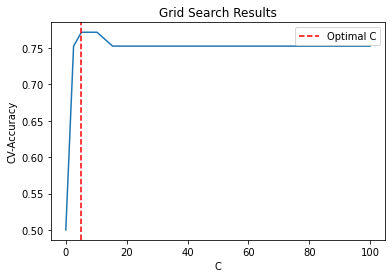

In [56]:
# The code performs a grid search with cross-validation (10-fold) to find the optimal value of the 'C' parameter in Lasso logistic regression. 
# It tries different values of 'C' specified in param_grid and evaluates the model's performance using 10-fold cross-validation. The result is stored in the grid_search object, which can be accessed to retrieve the best hyperparameters and evaluate the model's performance.

param_grid = {'C': np.linspace(0.01, 100, 40)}
# Create a logistic regression model with Lasso regularization
lasso_model = LogisticRegression(penalty='l1', solver='liblinear') # if I add max_iter=int(1e6), it blocks

# Perform grid search with cross-validation (cv=5)
grid_search = GridSearchCV(lasso_model, param_grid, cv=5)
grid_search.fit(normalized_X_train, y_train)

# Print the best lambda (alpha) value
print("Best lambda (alpha) for Lasso logistic regression: ", 1 / grid_search.best_estimator_.C)

# Print the best cross-validation score
print("Best cross-validation score: ", grid_search.best_score_)

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = grid_search.cv_results_['mean_test_score']

max_accuracy = np.max(accuracy_scores)
best_C = C_values[np.argmax(accuracy_scores)]


plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results')
plt.legend()
plt.show()

Best lambda (alpha) for Lasso logistic regression:  0.19463991615511306 (C=5.14).

In [57]:
cv_results = grid_search.cv_results_

# Print the mean test score for each hyperparameter setting
print("Mean test scores:")
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print("  - {}: {:.4f}".format(params, mean_score))

# Print the standard deviation of the test scores for each hyperparameter setting
print("Standard deviations of test scores:")
for std_score, params in zip(cv_results['std_test_score'], cv_results['params']):
    print("  - {}: {:.4f}".format(params, std_score))

Mean test scores:
  - {'C': 0.01}: 0.5000
  - {'C': 2.5738461538461537}: 0.7524
  - {'C': 5.137692307692308}: 0.7714
  - {'C': 7.701538461538462}: 0.7714
  - {'C': 10.265384615384615}: 0.7714
  - {'C': 12.829230769230769}: 0.7619
  - {'C': 15.393076923076924}: 0.7524
  - {'C': 17.95692307692308}: 0.7524
  - {'C': 20.520769230769233}: 0.7524
  - {'C': 23.084615384615386}: 0.7524
  - {'C': 25.64846153846154}: 0.7524
  - {'C': 28.212307692307693}: 0.7524
  - {'C': 30.77615384615385}: 0.7524
  - {'C': 33.339999999999996}: 0.7524
  - {'C': 35.90384615384615}: 0.7524
  - {'C': 38.4676923076923}: 0.7524
  - {'C': 41.03153846153846}: 0.7524
  - {'C': 43.59538461538462}: 0.7524
  - {'C': 46.15923076923077}: 0.7524
  - {'C': 48.723076923076924}: 0.7524
  - {'C': 51.286923076923074}: 0.7524
  - {'C': 53.85076923076923}: 0.7524
  - {'C': 56.41461538461538}: 0.7524
  - {'C': 58.97846153846154}: 0.7524
  - {'C': 61.542307692307695}: 0.7524
  - {'C': 64.10615384615386}: 0.7524
  - {'C': 66.67}: 0.752

In [58]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# After fitting the grid search, calculate metrics using cross_val_predict
best_lasso_model = grid_search.best_estimator_  # Get the best Lasso model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred = cross_val_predict(best_lasso_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
mean_precision_1 = np.mean(precision_scores_1)
std_precision_1 = np.std(precision_scores_1)
mean_recall_1 = np.mean(recall_scores_1)
std_recall_1 = np.std(recall_scores_1)
mean_f1_1 = np.mean(f1_scores_1)
std_f1_1 = np.std(f1_scores_1)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)
print("Mean Cross-Validation Precision - 1:", mean_precision_1)
print("Standard Deviation of Precision - 1:", std_precision_1)
print("Mean Cross-Validation Recall - 1:", mean_recall_1)
print("Standard Deviation of Recall - 1:", std_recall_1)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1)
print("Standard Deviation of F1-score - 1:", std_f1_1)

Mean Cross-Validation Accuracy: 0.7714285714285715
Standard Deviation of Accuracy: 0.04902681019517617
Mean Cross-Validation Precision - 1: 0.7613584356147285
Standard Deviation of Precision - 1: 0.06912603813115177
Mean Cross-Validation Recall - 1: 0.8
Standard Deviation of Recall - 1: 0.03563483225498992
Mean Cross-Validation F1-score - 1: 0.7788372093023255
Standard Deviation of F1-score - 1: 0.04337957285330039


In [59]:
precision_scores_1 

array([0.69565217, 0.72727273, 0.75      , 0.73913043, 0.89473684])

#### Compute the mean and the standard deviation cross-validation precision, recall and F1-score for the negative class 0

In [60]:
from sklearn.metrics import make_scorer
# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0 = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0 = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0 = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0)

# compute the mean and the standard deviation
mean_precision_0 = np.mean(precision_scores_0)
std_precision_0 = np.std(precision_scores_0)
mean_recall_0 = np.mean(recall_scores_0)
std_recall_0 = np.std(recall_scores_0)
mean_f1_0 = np.mean(f1_scores_0)
std_f1_0 = np.std(f1_scores_0)

print("Mean Cross-Validation Precision - 0:", mean_precision_0)
print("Standard Deviation of Precision - 0:", std_precision_0)
print("Mean Cross-Validation Recall - 0:", mean_recall_0)
print("Standard Deviation of Recall - 0:", std_recall_0)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0)
print("Standard Deviation of F1-score: - 0", std_f1_0)

Mean Cross-Validation Precision - 0: 0.7871472158657514
Standard Deviation of Precision - 0: 0.03889831128303645
Mean Cross-Validation Recall - 0: 0.7428571428571429
Standard Deviation of Recall - 0: 0.08302664654363189
Mean Cross-Validation F1-score: - 0 0.7629148899880607
Standard Deviation of F1-score: - 0 0.05528778519229349


In [61]:
precision_scores_0

array([0.73684211, 0.75      , 0.83333333, 0.78947368, 0.82608696])

In [64]:
# define a function that performs a Logistic Regression using Lasso (default C=1) as Regularization type
def Lasso (X_train, X_test, y_train, y_test):
   
    

# Definizione dell'istanza del modello.
    clf = LogisticRegression(penalty="l1", solver="liblinear", tol=1e-6, max_iter=int(1e6), warm_start=True, intercept_scaling=10000.0, C=5.14)   
# setting warm_start=False to start training from scratch each time, eliminating the influence of previous solutions.

# Addestramento del modello sui dati di training
    clf.fit(X_train, y_train)

# Predizione sui dati di test
    y_pred = clf.predict(X_test)

# Valutazione del modello
    print(classification_report(y_test, y_pred))

    coef_indexes = clf.coef_[0].nonzero()[0]

    # Numero delle feature con coefficiente diverso da zero
    n_features = len(coef_indexes)

    # Nomi delle feature con coefficiente diverso da zero
    feature_names = X.columns[coef_indexes]


    print(f"Numero di feature con coefficiente diverso da zero: {n_features}")
    print(f"Nomi delle feature con coefficiente diverso da zero: {feature_names}")

    explainer = shap.Explainer(clf, X_train)

# Calcola i valori Shapley per le feature del modello addestrato
    shap_values = explainer(X_test)

# Visualizza un grafico delle feature più importanti
    shap.plots.bar(shap_values.mean(0))
   # shap.plots.bar(shap_values)
    #shap.plots.force(shap_values)


    return (y_pred, feature_names)

              precision    recall  f1-score   support

           0       0.72      0.70      0.71        44
           1       0.70      0.72      0.71        43

    accuracy                           0.71        87
   macro avg       0.71      0.71      0.71        87
weighted avg       0.71      0.71      0.71        87

Numero di feature con coefficiente diverso da zero: 46
Nomi delle feature con coefficiente diverso da zero: Index(['TP53_Missense_Mutation_270_276', 'MAML3_In_Frame_Ins_503_503',
       'PIK3CA_Missense_Mutation_1046_1047', 'TP53_Missense_Mutation_173_225',
       'TP53_Missense_Mutation_236_258', 'GATA3_Frame_Shift_Ins_308_335',
       'PIK3CA_Missense_Mutation_545_546', 'ERBB2_Missense_Mutation_767_777',
       'GATA3_Splice_Site_308_335', 'TP53_Nonsense_Mutation_173_225',
       'PIK3CA_Missense_Mutation_541_542', 'FOXA1_Missense_Mutation_226_268',
       'PIK3CA_Missense_Mutation_345_345', 'TP53_Frame_Shift_Del_173_225',
       'GATA3_Frame_Shift_Ins_406_408', 

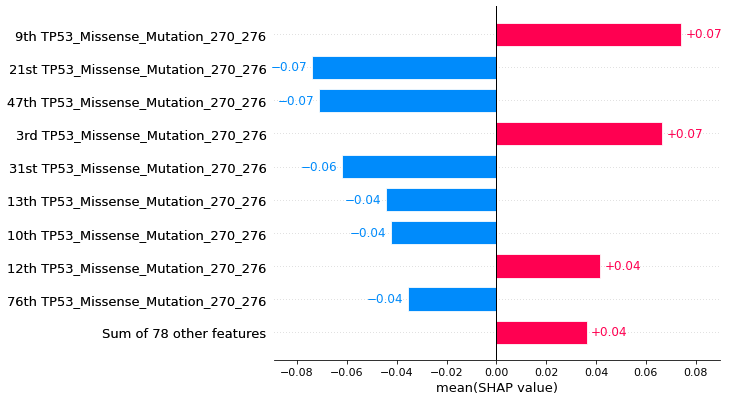

In [65]:
y_pred_simple_Lasso, feature_names_simple_Lasso = Lasso(normalized_X_train, normalized_X_test, y_train, y_test)

46 features have a coefficent different from zero.

### Study of the function Lasso

In [67]:
clf_simple_LogRegr = LogisticRegression(penalty="l1", solver="liblinear", tol=1e-6, max_iter=10000, warm_start=False, intercept_scaling=10000.0, C=5.14)   

In [68]:
clf_simple_LogRegr.fit(normalized_X_train, y_train)

LogisticRegression(C=5.14, intercept_scaling=10000.0, max_iter=10000,
                   penalty='l1', solver='liblinear', tol=1e-06)

In [69]:
y_pred_simple_Lasso = clf_simple_LogRegr.predict(normalized_X_test)

In [70]:
y_pred_simple_Lasso

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1], dtype=int64)

In [71]:
y_test

TCGA-B6-A401              0
TCGA-B6-A0X5              0
TCGA-A2-A0D0              1
TCGA-A2-A0CL              0
TCGA-D8-A142              1
                         ..
brca_smc_2018_BR371       0
brca_smc_2018_BB01_017    0
TCGA-A7-A0DB              0
brca_smc_2018_BB01_126    1
TCGA-E9-A1N8              1
Name: Target, Length: 70, dtype: int64

In [72]:
print(classification_report(y_test, y_pred_simple_Lasso))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        35
           1       0.80      0.80      0.80        35

    accuracy                           0.80        70
   macro avg       0.80      0.80      0.80        70
weighted avg       0.80      0.80      0.80        70



In [73]:
coef_indexes_simple_Lasso = clf_simple_LogRegr.coef_[0].nonzero()[0]

# Numero delle feature con coefficiente diverso da zero
n_features_simple_Lasso = len(coef_indexes_simple_Lasso)

# Nomi delle feature con coefficiente diverso da zero
feature_names_simple_Lasso = X.columns[coef_indexes_simple_Lasso]


print(f"Numero di feature con coefficiente diverso da zero: {n_features_simple_Lasso}")
print(f"Nomi delle feature con coefficiente diverso da zero: {feature_names_simple_Lasso}")


Numero di feature con coefficiente diverso da zero: 31
Nomi delle feature con coefficiente diverso da zero: Index(['TP53_Missense_Mutation_270_282', 'MAML3_In_Frame_Ins_503_503',
       'PIK3CA_Missense_Mutation_1046_1047', 'TP53_Missense_Mutation_173_177',
       'TP53_Missense_Mutation_236_258', 'PIK3CA_Missense_Mutation_545_546',
       'TP53_Nonsense_Mutation_191_199', 'PIK3CA_Missense_Mutation_541_542',
       'PIK3CA_Missense_Mutation_345_345', 'AKT1_Missense_Mutation_17_17',
       'TMPRSS13_Missense_Mutation_77_83', 'TP53_Missense_Mutation_191_199',
       'PIK3CA_Missense_Mutation_102_113', 'TP53_Frame_Shift_Del_236_258',
       'TP53_Frame_Shift_Del_191_199', 'TP53_In_Frame_Del_191_199',
       'TP53_Silent_270_282', 'NOTCH2_Frame_Shift_Del_2297_2303',
       'TP53_Nonsense_Mutation_236_258', 'TP53_In_Frame_Del_173_177',
       'TP53_Frame_Shift_Del_270_282', 'PIK3R1_In_Frame_Ins_566_578',
       'TP53_Frame_Shift_Ins_236_258', 'TP53_Nonsense_Mutation_270_282',
       'TP53_S

## Evaluate the model with classification metrics 

In [64]:
# Test accuracy 
accuracy_simple_LassoLogRegr = np.mean(y_test == y_pred_simple_Lasso)
print("Accuracy:", accuracy_simple_LassoLogRegr)

Accuracy: 0.8


In [65]:
# build the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

cm_simple_LassoLogRegr = confusion_matrix(y_test, y_pred_simple_Lasso)
print(cm_simple_LassoLogRegr)

[[28  7]
 [ 7 28]]


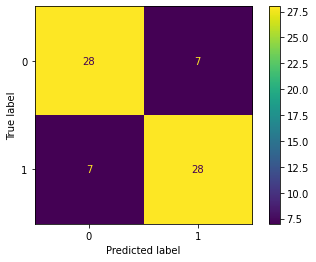

In [66]:
# Plot test confusion matrix
plot_confusion_matrix(clf_simple_LogRegr, normalized_X_test, y_test)

In [75]:
# precision: TP/(TP+FP) accuracy of the positive prediction
def precision(cm):
    TP = cm[1,1]
    TPFP = cm[:,1].sum()
    return TP / TPFP

In [68]:
print("Precision ", precision(cm_simple_LassoLogRegr))

Precision  0.8


In [76]:
# Recall:  TP/(TP+FN) ratio of positive instances correctly detected by the classifier
def recall(cm):
    TP = cm[1,1]
    T = cm[1,:].sum()
    return TP / T

In [70]:
print("Recall:", recall(cm_simple_LassoLogRegr))

Recall: 0.8


In [77]:
# F1 score: 2 * precision_RF * recall_RF / (precision_RF + recall_RF)
def f1(cm):
    p = precision(cm)
    r = recall(cm)
    return (2 * p * r) / (p + r)

In [72]:
print("F1:", f1(cm_simple_LassoLogRegr))

F1: 0.8000000000000002


In [78]:
# MCC (Matthews correlation coefficient)

def mcc(y_true, y_pred):
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    tn = np.sum(np.logical_and(y_true == 0, y_pred == 0))
    fp = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    fn = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    
    mcc_value = numerator / denominator
    return mcc_value

In [74]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_simple_Lasso == 1))
tp

28

In [75]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_simple_Lasso == 0))
tn

28

In [76]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_simple_Lasso == 1))
fp

7

In [77]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_simple_Lasso == 0))
fn

7

In [78]:
print("MCC:", mcc(y_test, y_pred_simple_Lasso))

MCC: 0.6


In [74]:
feature_names_lista_simple_Lasso = list(feature_names_simple_Lasso)
feature_names_lista_simple_Lasso

['TP53_Missense_Mutation_270_282',
 'MAML3_In_Frame_Ins_503_503',
 'PIK3CA_Missense_Mutation_1046_1047',
 'TP53_Missense_Mutation_173_177',
 'TP53_Missense_Mutation_236_258',
 'PIK3CA_Missense_Mutation_545_546',
 'TP53_Nonsense_Mutation_191_199',
 'PIK3CA_Missense_Mutation_541_542',
 'PIK3CA_Missense_Mutation_345_345',
 'AKT1_Missense_Mutation_17_17',
 'TMPRSS13_Missense_Mutation_77_83',
 'TP53_Missense_Mutation_191_199',
 'PIK3CA_Missense_Mutation_102_113',
 'TP53_Frame_Shift_Del_236_258',
 'TP53_Frame_Shift_Del_191_199',
 'TP53_In_Frame_Del_191_199',
 'TP53_Silent_270_282',
 'NOTCH2_Frame_Shift_Del_2297_2303',
 'TP53_Nonsense_Mutation_236_258',
 'TP53_In_Frame_Del_173_177',
 'TP53_Frame_Shift_Del_270_282',
 'PIK3R1_In_Frame_Ins_566_578',
 'TP53_Frame_Shift_Ins_236_258',
 'TP53_Nonsense_Mutation_270_282',
 'TP53_Silent_236_258',
 'TP53_Nonsense_Mutation_173_177',
 'PIK3CA_Silent_541_542',
 'TP53_Frame_Shift_Ins_270_282',
 'ZKSCAN1_Frame_Shift_Ins_270_270',
 'ZNF195_Missense_Mutation_1

In [75]:
len(feature_names_lista_simple_Lasso)

31

In [76]:
feature_names_lista_simple_Lasso_df = pd.DataFrame({'Lasso features': feature_names_lista_simple_Lasso})
feature_names_lista_simple_Lasso_df

,Lasso features
0,TP53_Missense_Mutation_270_282
1,MAML3_In_Frame_Ins_503_503
2,PIK3CA_Missense_Mutation_1046_1047
3,TP53_Missense_Mutation_173_177
4,TP53_Missense_Mutation_236_258
5,PIK3CA_Missense_Mutation_545_546
6,TP53_Nonsense_Mutation_191_199
7,PIK3CA_Missense_Mutation_541_542
8,PIK3CA_Missense_Mutation_345_345
9,AKT1_Missense_Mutation_17_17


#### Extract only the Hugo Symbol from the features 

In [77]:
feature_names_lista_simple_Lasso_df['Hugo_Symbol'] = feature_names_lista_simple_Lasso_df['Lasso features'].str.split('_').str[0]
feature_names_lista_simple_Lasso_df

,Lasso features,Hugo_Symbol
0,TP53_Missense_Mutation_270_282,TP53
1,MAML3_In_Frame_Ins_503_503,MAML3
2,PIK3CA_Missense_Mutation_1046_1047,PIK3CA
3,TP53_Missense_Mutation_173_177,TP53
4,TP53_Missense_Mutation_236_258,TP53
5,PIK3CA_Missense_Mutation_545_546,PIK3CA
6,TP53_Nonsense_Mutation_191_199,TP53
7,PIK3CA_Missense_Mutation_541_542,PIK3CA
8,PIK3CA_Missense_Mutation_345_345,PIK3CA
9,AKT1_Missense_Mutation_17_17,AKT1


In [78]:
feature_names_lista_simple_Lasso_df_onlyHugo = feature_names_lista_simple_Lasso_df[['Hugo_Symbol']]
feature_names_lista_simple_Lasso_df_onlyHugo

,Hugo_Symbol
0,TP53
1,MAML3
2,PIK3CA
3,TP53
4,TP53
5,PIK3CA
6,TP53
7,PIK3CA
8,PIK3CA
9,AKT1


In [79]:
feature_names_lista_simple_Lasso_df_onlyHugo.duplicated().sum()

21

In [80]:
# consider just unique genes - drop duplicates 
feature_names_lista_simple_Lasso_df_onlyHugo_nodup = feature_names_lista_simple_Lasso_df_onlyHugo.drop_duplicates()
feature_names_lista_simple_Lasso_df_onlyHugo_nodup

,Hugo_Symbol
0,TP53
1,MAML3
2,PIK3CA
9,AKT1
10,TMPRSS13
17,NOTCH2
21,PIK3R1
28,ZKSCAN1
29,ZNF195
30,MYL10


In [81]:
feature_names_lista_simple_Lasso_df_onlyHugo_nodup.shape

(10, 1)

In [82]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Significant features")
# save the training patients 
feature_names_lista_simple_Lasso_df_onlyHugo_nodup.to_csv('3B_features_onlygenes_LASSO.txt', index=False, sep='\t')

# Ridge Logistic Regression

## Grid search to find the optimal parameter for Ridge regression

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, solver='liblinear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.84676923e+01,
       4.103...1, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])})

Best C for Ridge logistic regression:  7.701538461538462
Best cross-validation score:  0.7571428571428571


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results for Ridge Logistic Regression')

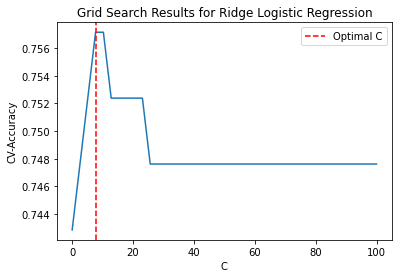

In [60]:
# Create a grid of alpha values for Ridge regularization
param_grid = {'C': np.linspace(0.01, 100, 40)}

# Create a logistic regression model with Ridge regularization (L2)
ridge_model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=10000)

# Perform grid search with cross-validation (cv=5)
grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
grid_search.fit(normalized_X_train, y_train)

# Print the best C value
print("Best C for Ridge logistic regression: ", grid_search.best_estimator_.C)

# Print the best cross-validation score
print("Best cross-validation score: ", grid_search.best_score_)

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = grid_search.cv_results_['mean_test_score']

max_accuracy = np.max(accuracy_scores)
best_C = C_values[np.argmax(accuracy_scores)]

plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results for Ridge Logistic Regression')
plt.legend()
plt.show()

Best lambda (alpha) for Ridge logistic regression: 0.13 (C=7.7).

### Compute the classification metrics on the cross-validation results 

In [61]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_ridge_model = grid_search.best_estimator_  # Get the best Ridge model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_Ridge = cross_val_predict(best_ridge_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_R = np.mean(accuracy_scores_R)
std_accuracy_R = np.std(accuracy_scores_R)
mean_precision_1_R = np.mean(precision_scores_1_R)
std_precision_1_R = np.std(precision_scores_1_R)
mean_recall_1_R = np.mean(recall_scores_1_R)
std_recall_1_R = np.std(recall_scores_1_R)
mean_f1_1_R = np.mean(f1_scores_1_R)
std_f1_1_R = np.std(f1_scores_1_R)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_R)
print("Standard Deviation of Accuracy:", std_accuracy_R)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_R)
print("Standard Deviation of Precision - 1:", std_precision_1_R)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_R)
print("Standard Deviation of Recall - 1:", std_recall_1_R)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_R)
print("Standard Deviation of F1-score - 1:", std_f1_1_R)

Mean Cross-Validation Accuracy: 0.7571428571428571
Standard Deviation of Accuracy: 0.03809523809523809
Mean Cross-Validation Precision - 1: 0.760839118255998
Standard Deviation of Precision - 1: 0.06526988337004058
Mean Cross-Validation Recall - 1: 0.761904761904762
Standard Deviation of Recall - 1: 0.052164053095730085
Mean Cross-Validation F1-score - 1: 0.7585873775347458
Standard Deviation of F1-score - 1: 0.03353570922536628


In [62]:
# NEGATIVE CLASS (0) 

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_R = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_R)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_R = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_R)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_R = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_R)

# compute the mean and the standard deviation
mean_precision_0_R = np.mean(precision_scores_0_R)
std_precision_0_R = np.std(precision_scores_0_R)
mean_recall_0_R = np.mean(recall_scores_0_R)
std_recall_0_R = np.std(recall_scores_0_R)
mean_f1_0_R = np.mean(f1_scores_0_R)
std_f1_0_R = np.std(f1_scores_0_R)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_R)
print("Standard Deviation of Precision - 0:", std_precision_0_R)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_R)
print("Standard Deviation of Recall - 0:", std_recall_0_R)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_R)
print("Standard Deviation of F1-score: - 0", std_f1_0_R)

Mean Cross-Validation Precision - 0: 0.7612731829573935
Standard Deviation of Precision - 0: 0.03999846229165975
Mean Cross-Validation Recall - 0: 0.7523809523809524
Standard Deviation of Recall - 0: 0.08192690730516788
Mean Cross-Validation F1-score: - 0 0.7543016403885969
Standard Deviation of F1-score: - 0 0.04468503205297001


## Ridge on the test set

In [63]:
def Ridge(X_train, X_test, y_train, y_test):

# Definizione dell'istanza del modello
    clf = LogisticRegression(penalty="l2", solver="liblinear" , tol=1e-6, max_iter=int(1e6), warm_start=False, intercept_scaling=10000.0, random_state = 123, C=7.7)

# Addestramento del modello sui dati di training
    clf.fit(X_train, y_train)

# Predizione sui dati di test
    y_pred = clf.predict(X_test)

# Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    coef_indexes = clf.coef_[0].nonzero()[0]

    # Numero delle feature con coefficiente diverso da zero
    n_features = len(coef_indexes)

    # Nomi delle feature con coefficiente diverso da zero
    feature_names = X.columns[coef_indexes]

    print(f"Numero di feature con coefficiente diverso da zero: {n_features}")
    print(f"Nomi delle feature con coefficiente diverso da zero: {feature_names}")
    
    explainer = shap.Explainer(clf, X_train)

    # Calcola i valori Shapley per le feature del modello addestrato
    shap_values = explainer(X_test)

    # Visualizza un grafico delle feature più importanti
    shap.plots.bar(shap_values.mean(0))

    return (y_pred, feature_names)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        35
           1       0.81      0.83      0.82        35

    accuracy                           0.81        70
   macro avg       0.81      0.81      0.81        70
weighted avg       0.81      0.81      0.81        70

Numero di feature con coefficiente diverso da zero: 39
Nomi delle feature con coefficiente diverso da zero: Index(['TP53_Missense_Mutation_270_282', 'MAML3_In_Frame_Ins_503_503',
       'PIK3CA_Missense_Mutation_1046_1047', 'TP53_Missense_Mutation_173_177',
       'TP53_Missense_Mutation_236_258', 'PIK3CA_Missense_Mutation_545_546',
       'TP53_Nonsense_Mutation_191_199', 'PIK3CA_Missense_Mutation_541_542',
       'PIK3CA_Missense_Mutation_345_345', 'AKT1_Missense_Mutation_17_17',
       'TMPRSS13_Missense_Mutation_77_83', 'TP53_Missense_Mutation_191_199',
       'PIK3CA_Missense_Mutation_102_113', 'TP53_Frame_Shift_Del_236_258',
       'CTCF_Missense_Mutation_283

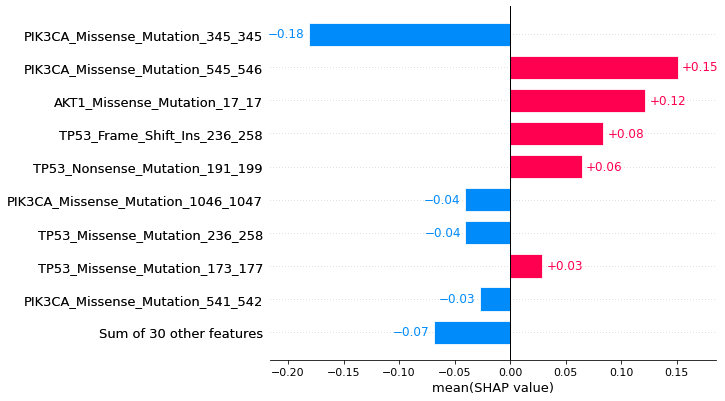

In [64]:
y_pred_simple_Ridge, feature_names_simple_Ridge = Ridge(normalized_X_train, normalized_X_test, y_train, y_test)

### Study of the function Ridge

In [65]:
clf_simple_LogRegr_Ridge = LogisticRegression(penalty="l2", solver="liblinear" , tol=1e-6, max_iter=int(1e6), warm_start=False, intercept_scaling=10000.0, random_state = 123, C=7.7)

In [66]:
clf_simple_LogRegr_Ridge.fit(normalized_X_train, y_train)

LogisticRegression(C=7.7, intercept_scaling=10000.0, max_iter=1000000,
                   random_state=123, solver='liblinear', tol=1e-06)

In [67]:
y_pred_simple_Ridge = clf_simple_LogRegr_Ridge.predict(normalized_X_test)

In [68]:
y_pred_simple_Ridge

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1], dtype=int64)

## Evaluate the model with classification metrics - Ridge Logistic Regression

In [69]:
# Test accuracy 
accuracy_simple_RidgeLogRegr = np.mean(y_test == y_pred_simple_Ridge)
print("Accuracy:", accuracy_simple_RidgeLogRegr)

Accuracy: 0.8142857142857143


In [70]:
cm_simple_RidgeLogRegr = confusion_matrix(y_test, y_pred_simple_Ridge)
print(cm_simple_RidgeLogRegr)

[[28  7]
 [ 6 29]]


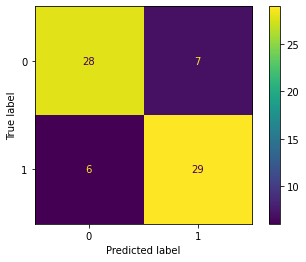

In [71]:
# Plot test confusion matrix
plot_confusion_matrix(clf_simple_LogRegr_Ridge, normalized_X_test, y_test)

In [72]:
print("Precision ", precision(cm_simple_RidgeLogRegr))

Precision  0.8055555555555556


In [73]:
print("Recall:", recall(cm_simple_RidgeLogRegr))

Recall: 0.8285714285714286


In [74]:
print("F1:", f1(cm_simple_RidgeLogRegr))

F1: 0.8169014084507044


In [75]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_simple_Ridge == 1))
tp

29

In [76]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_simple_Ridge == 0))
tn

28

In [77]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_simple_Ridge == 1))
fp

7

In [78]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_simple_Ridge == 0))
fn

6

In [79]:
print("MCC:", mcc(y_test, y_pred_simple_Ridge))

MCC: 0.6288281455225324


# Full Logistic Regression

## Cross-validation

In [62]:
# Create a Logistic Regression model without regularization
logreg_model = LogisticRegression(solver="newton-cg", penalty='none')

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.71428571 0.78571429 0.76190476 0.71428571 0.80952381]
Mean CV Accuracy: 0.7571428571428571


In [63]:
## POSITIVE CLASS (1)

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_logreg = cross_val_predict(logreg_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_logreg = np.mean(accuracy_scores_logreg)
std_accuracy_logreg = np.std(accuracy_scores_logreg)
mean_precision_1_logreg = np.mean(precision_scores_1_logreg)
std_precision_1_logreg = np.std(precision_scores_1_logreg)
mean_recall_1_logreg = np.mean(recall_scores_1_logreg)
std_recall_1_logreg = np.std(recall_scores_1_logreg)
mean_f1_1_logreg = np.mean(f1_scores_1_logreg)
std_f1_1_logreg = np.std(f1_scores_1_logreg)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_logreg)
print("Standard Deviation of Accuracy:", std_accuracy_logreg)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_logreg)
print("Standard Deviation of Precision - 1:", std_precision_1_logreg)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_logreg)
print("Standard Deviation of Recall - 1:", std_recall_1_logreg)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_logreg)
print("Standard Deviation of F1-score - 1:", std_f1_1_logreg)

Mean Cross-Validation Accuracy: 0.7571428571428571
Standard Deviation of Accuracy: 0.03809523809523809
Mean Cross-Validation Precision - 1: 0.7624581658750457
Standard Deviation of Precision - 1: 0.06981470899125947
Mean Cross-Validation Recall - 1: 0.761904761904762
Standard Deviation of Recall - 1: 0.052164053095730085
Mean Cross-Validation F1-score - 1: 0.758825725259838
Standard Deviation of F1-score - 1: 0.03147563191251664


In [64]:
# NEGATIVE CLASS (0) 

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_logreg = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_logreg)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_logreg = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_logreg)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_logreg = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_logreg)

# compute the mean and the standard deviation
mean_precision_0_logreg = np.mean(precision_scores_0_logreg)
std_precision_0_logreg = np.std(precision_scores_0_logreg)
mean_recall_0_logreg = np.mean(recall_scores_0_logreg)
std_recall_0_logreg = np.std(recall_scores_0_logreg)
mean_f1_0_logreg = np.mean(f1_scores_0_logreg)
std_f1_0_logreg = np.std(f1_scores_0_logreg)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_logreg)
print("Standard Deviation of Precision - 0:", std_precision_0_logreg)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_logreg)
print("Standard Deviation of Recall - 0:", std_recall_0_logreg)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_logreg)
print("Standard Deviation of F1-score: - 0", std_f1_0_logreg)

Mean Cross-Validation Precision - 0: 0.7614769008081701
Standard Deviation of Precision - 0: 0.036913811662487694
Mean Cross-Validation Recall - 0: 0.7523809523809524
Standard Deviation of Recall - 0: 0.09233675918888247
Mean Cross-Validation F1-score: - 0 0.7535824900978432
Standard Deviation of F1-score: - 0 0.0476025101802531


## Full Logistic Regression on the test set 

In [65]:
def Full_LogReg(X_train, X_test, y_train, y_test):

# Definizione dell'istanza del modello
         clf_logreg = LogisticRegression(solver="newton-cg", penalty='none') 
# Addestramento del modello sui dati di training 
         clf_logreg.fit(X_train, y_train)  
# Predizione sui dati di test
         y_pred = clf_logreg.predict(X_test)
# Valutazione del modello
         print(classification_report(y_test, y_pred))
    
         return(y_pred)

In [66]:
y_pred_logreg = Full_LogReg(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        35
           1       0.80      0.80      0.80        35

    accuracy                           0.80        70
   macro avg       0.80      0.80      0.80        70
weighted avg       0.80      0.80      0.80        70



### Study of the full logistic regression function

In [67]:
clf_simple_LogRegr_Full = LogisticRegression(solver="newton-cg", penalty='none')

In [68]:
clf_simple_LogRegr_Full.fit(normalized_X_train, y_train)

LogisticRegression(penalty='none', solver='newton-cg')

In [69]:
y_pred_full_logreg = clf_simple_LogRegr_Full.predict(normalized_X_test)

In [70]:
y_pred_full_logreg

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1], dtype=int64)

## Evaluate the model with classification metrics - Ridge Logistic Regression

In [71]:
# Test accuracy 
accuracy_full_logreg = np.mean(y_test == y_pred_full_logreg)
print("Accuracy:", accuracy_full_logreg)

Accuracy: 0.8


In [72]:
cm_full_logreg = confusion_matrix(y_test, y_pred_full_logreg)
print(cm_full_logreg)

[[28  7]
 [ 7 28]]


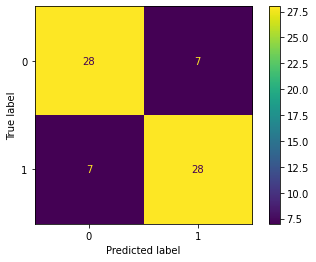

In [82]:
# Plot test confusion matrix
plot_confusion_matrix(clf_simple_LogRegr_Full, normalized_X_test, y_test)

In [83]:
print("Precision ", precision(cm_full_logreg))

Precision  0.8


In [84]:
print("Recall:", recall(cm_full_logreg))

Recall: 0.8


In [85]:
print("F1:", f1(cm_full_logreg))

F1: 0.8000000000000002


In [86]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_full_logreg == 1))
tp

28

In [87]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_full_logreg == 0))
tn

28

In [88]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_full_logreg == 1))
fp

7

In [89]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_full_logreg == 0))
fn

7

In [90]:
print("MCC:", mcc(y_test, y_pred_full_logreg))

MCC: 0.6


# Support Vector Machine (SVM)

The SVM algorithm finds a robust solution to the linearly separable problem. That is, there exists a hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0}\right)} = \mathbf{w}^{T} \cdot \mathbf{x}+w_{0}=0$, that separates two categories:

$\left\{\begin{array}{ll}{\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \geqslant 1,} & {\text { if } y_{i}=+1} \\ {\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \leqslant-1,} & {\text { if } y_{i}=-1}\end{array}\right.$

Every training point is either above the hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0} - 1\right)}$ or below the hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0} + 1\right)}$ . We call them *marginal hyperplanes*. Of course there are infinitely many hyperplanes for which the condition is satisfied, but the **hyperplane with the largest margin** is the one that appears in the Support Vector Machine model. **Margin** is the distance between marginal hyperplanes $M=1 /\|\mathbf{w}\|$.

### Linearly Separable case (hard margins)

Is the solution to the optimization problem:

$\min _{\mathbf{w}, w_{0}}\left\{\frac{1}{2}\|\mathbf{w}\|^{2}\right\}$

$\left\{\begin{array}{ll}{\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \geqslant 1,} & {\text { if } y_{i}=+1} \\ {\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \leqslant-1,} & {\text { if } y_{i}=-1}\end{array}\right.$


## 1) Linear Kernel

## Grid search to find the optimal parameter for Support Vector Machine

Let's tune the regularization parameter C that controls the trade-off between maximizing the margin (separating the data points as well as possible) and minimizing the classification error (allowing some data points to be misclassified). It's often referred to as the "soft margin" parameter because it allows for some level of misclassification within the training data.

- **Small C (Strong Regularization)**: when 'C' is small, the SVM optimization will focus on finding the largest margin even if it results in some training data points being misclassified. In other words, the model is penalized more for misclassifying data points and, as a result, may have a narrower margin. This is useful when there's a lot of noise in the data, and the goal is to have a more robust and generalized model.
- **Large C (Weak Regularization)**: when 'C' is large, the SVM optimization will strive to classify all training data points correctly, even if it means having a smaller margin. In this case, the model is penalized less for misclassification, and it may be more prone to overfitting the training data. This can be useful when the training data is well-behaved and the goal is to maximize the accuracy on the training data.

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.84676923e+01,
       4.10315385e+01, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])},
             scoring='accuracy')

Best 'C' for Linear SVM: 5.137692307692308
Best cv accuracy: 0.7761904761904762


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results for Linear Kernel SVM')

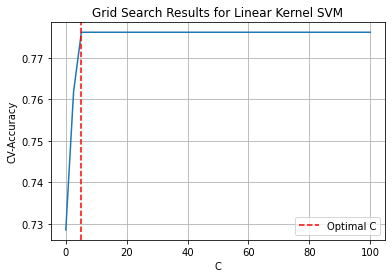

In [80]:
# Define the range of 'C' values to test
param_grid = {'C': np.linspace(0.01, 100, 40)}

# Create a linear kernel SVM and perform grid search
linear_svm = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, scoring='accuracy', refit=True)
linear_svm.fit(normalized_X_train, y_train)

# Print the best 'C' value and its corresponding accuracy
best_C = linear_svm.best_params_['C']
best_cv_accuracy = linear_svm.best_score_

print("Best 'C' for Linear SVM:", best_C)
print("Best cv accuracy:", best_cv_accuracy)

# Get the best model (trained with the best 'C' value)
best_linear_svm_model = linear_svm.best_estimator_

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = linear_svm.cv_results_['mean_test_score']

best_C = C_values[np.argmax(accuracy_scores)]
max_accuracy = np.max(accuracy_scores)

# Plot the C values against cross-validation accuracy
plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results for Linear Kernel SVM')
plt.legend()
plt.grid()
plt.show()

Best C for Linear SVM: 5.14

### Compute the classification metrics on the cross-validation results

In [81]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_linear_svm_model = linear_svm.best_estimator_  # Get the best Linear SVM model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_linear_svm = cross_val_predict(best_linear_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_linear_svm = np.mean(accuracy_scores_linear_svm)
std_accuracy_linear_svm = np.std(accuracy_scores_linear_svm)
mean_precision_1_linear_svm = np.mean(precision_scores_1_linear_svm)
std_precision_1_linear_svm = np.std(precision_scores_1_linear_svm)
mean_recall_1_linear_svm = np.mean(recall_scores_1_linear_svm)
std_recall_1_linear_svm = np.std(recall_scores_1_linear_svm)
mean_f1_1_linear_svm = np.mean(f1_scores_1_linear_svm)
std_f1_1_linear_svm = np.std(f1_scores_1_linear_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_linear_svm)
print("Standard Deviation of Accuracy:", std_accuracy_linear_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_linear_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_linear_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_linear_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_linear_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_linear_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_linear_svm)

Mean Cross-Validation Accuracy: 0.7761904761904762
Standard Deviation of Accuracy: 0.05553287518900286
Mean Cross-Validation Precision - 1: 0.7720397832525978
Standard Deviation of Precision - 1: 0.06998850105586664
Mean Cross-Validation Recall - 1: 0.7904761904761906
Standard Deviation of Recall - 1: 0.04856209060564556
Mean Cross-Validation F1-score - 1: 0.7800976542837008
Standard Deviation of F1-score - 1: 0.05199160531020915


In [82]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_linear_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_linear_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_linear_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_linear_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_linear_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_linear_svm)

# compute the mean and the standard deviation
mean_precision_0_linear_svm = np.mean(precision_scores_0_linear_svm)
std_precision_0_linear_svm = np.std(precision_scores_0_linear_svm)
mean_recall_0_linear_svm = np.mean(recall_scores_0_linear_svm)
std_recall_0_linear_svm = np.std(recall_scores_0_linear_svm)
mean_f1_0_linear_svm = np.mean(f1_scores_0_linear_svm)
std_f1_0_linear_svm = np.std(f1_scores_0_linear_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_linear_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_linear_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_linear_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_linear_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_linear_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_linear_svm)

Mean Cross-Validation Precision - 0: 0.7839141331589845
Standard Deviation of Precision - 0: 0.0504413667849333
Mean Cross-Validation Recall - 0: 0.7619047619047619
Standard Deviation of Recall - 0: 0.07968190728895957
Mean Cross-Validation F1-score: - 0 0.7716935909618836
Standard Deviation of F1-score: - 0 0.0594990710589705


# Linear SVM on the test set 

In [83]:
def LinearSVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='linear', C=5.14)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [84]:
y_pred_linear_svm = LinearSVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        35
           1       0.79      0.77      0.78        35

    accuracy                           0.79        70
   macro avg       0.79      0.79      0.79        70
weighted avg       0.79      0.79      0.79        70



### Study of the Linear SVM function

In [85]:
clf_linear_svm = SVC(kernel='linear', C=5.14)

In [86]:
clf_linear_svm.fit(normalized_X_train, y_train)

SVC(C=5.14, kernel='linear')

In [87]:
y_pred_linear_svm = clf_linear_svm.predict(normalized_X_test)

In [88]:
y_pred_linear_svm

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1], dtype=int64)

## Evaluate the model with classification metrics 

In [89]:
# Test accuracy 
accuracy_linear_svm = np.mean(y_test == y_pred_linear_svm)
print("Accuracy:", accuracy_linear_svm)

Accuracy: 0.7857142857142857


In [90]:
# build the confusion matrix
cm_linear_svm = confusion_matrix(y_test, y_pred_linear_svm)
print(cm_linear_svm)

[[28  7]
 [ 8 27]]


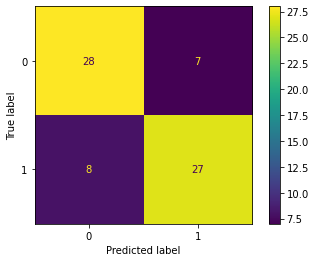

In [91]:
# Plot test confusion matrix
plot_confusion_matrix(clf_linear_svm, normalized_X_test, y_test)

In [92]:
print("Precision ", precision(cm_linear_svm))

Precision  0.7941176470588235


In [93]:
print("Recall:", recall(cm_linear_svm))

Recall: 0.7714285714285715


In [94]:
print("F1:", f1(cm_linear_svm))

F1: 0.782608695652174


In [95]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_linear_svm == 1))
tp

27

In [96]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_linear_svm == 0))
tn

28

In [97]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_linear_svm == 1))
fp

7

In [98]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_linear_svm == 0))
fn

8

In [99]:
print("MCC:", mcc(y_test, y_pred_linear_svm))

MCC: 0.5716619504750294


# SVM - Polynomial Kernel

## Grid search to find the optimal parameters for SVM polynomial kernel

- **C**: it controls the trade-off between maximizing the margin and minimizing the classification error. It's a regularization parameter.
- **coef0**: coefficient of the polynomial kernel function
- **degree**: it specifies the degree of the polynomial kernel function

In [91]:
# Polynomial
param_grid = {'C': np.linspace(0.001, 100, 5),
              'coef0': np.linspace(-10, 10, 5),
              'degree': [2, 3, 4]}

# Create a polynomial kernel and perform grid search
poly_svm = GridSearchCV(SVC(kernel='poly'), param_grid,
                        cv=5, scoring='accuracy', refit=True)
poly_svm.fit(normalized_X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_C_poly = poly_svm.best_params_['C']
best_degree_poly = poly_svm.best_params_['degree']
best_coef0_poly = poly_svm.best_params_['coef0']
best_cv_accuracy_poly = poly_svm.best_score_

print("Best 'C' for Polynomial SVM:", best_C_poly)
print("Best degree:", best_degree_poly)
print("Best coef0:", best_coef0_poly)
print("Best cv accuracy:", best_cv_accuracy_poly)

# Get the best model (trained with the best hyperparameters)
best_poly_svm_model = poly_svm.best_estimator_

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'coef0': array([-10.,  -5.,   0.,   5.,  10.]),
                         'degree': [2, 3, 4]},
             scoring='accuracy')

Best 'C' for Polynomial SVM: 50.000499999999995
Best degree: 3
Best coef0: -10.0
Best cv accuracy: 0.780952380952381


### Compute the classification metrics on the cross-validation results

In [92]:
# POSITIVE CLASS (1)


# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_poly_svm = cross_val_predict(best_poly_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_poly_svm = np.mean(accuracy_scores_poly_svm)
std_accuracy_poly_svm = np.std(accuracy_scores_poly_svm)
mean_precision_1_poly_svm = np.mean(precision_scores_1_poly_svm)
std_precision_1_poly_svm = np.std(precision_scores_1_poly_svm)
mean_recall_1_poly_svm = np.mean(recall_scores_1_poly_svm)
std_recall_1_poly_svm = np.std(recall_scores_1_poly_svm)
mean_f1_1_poly_svm = np.mean(f1_scores_1_poly_svm)
std_f1_1_poly_svm = np.std(f1_scores_1_poly_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_poly_svm)
print("Standard Deviation of Accuracy:", std_accuracy_poly_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_poly_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_poly_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_poly_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_poly_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_poly_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_poly_svm)

Mean Cross-Validation Accuracy: 0.780952380952381
Standard Deviation of Accuracy: 0.05512303287042964
Mean Cross-Validation Precision - 1: 0.7742136962960762
Standard Deviation of Precision - 1: 0.06909565650565094
Mean Cross-Validation Recall - 1: 0.8
Standard Deviation of Recall - 1: 0.055532875189002844
Mean Cross-Validation F1-score - 1: 0.7855521997382462
Standard Deviation of F1-score - 1: 0.05236154242152935


In [93]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_poly_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_poly_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_poly_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_poly_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_poly_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_poly_svm)

# compute the mean and the standard deviation
mean_precision_0_poly_svm = np.mean(precision_scores_0_poly_svm)
std_precision_0_poly_svm = np.std(precision_scores_0_poly_svm)
mean_recall_0_poly_svm = np.mean(recall_scores_0_poly_svm)
std_recall_0_poly_svm = np.std(recall_scores_0_poly_svm)
mean_f1_0_poly_svm = np.mean(f1_scores_0_poly_svm)
std_f1_0_poly_svm = np.std(f1_scores_0_poly_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_poly_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_poly_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_poly_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_poly_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_poly_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_poly_svm)

Mean Cross-Validation Precision - 0: 0.7926860629835459
Standard Deviation of Precision - 0: 0.05431072157392752
Mean Cross-Validation Recall - 0: 0.7619047619047619
Standard Deviation of Recall - 0: 0.07968190728895957
Mean Cross-Validation F1-score: - 0 0.7755397448080374
Standard Deviation of F1-score: - 0 0.05858700604983741


## Polynomial SVM on the test set 

In [94]:
def PolySVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='poly', C=50, degree=3, coef0=-10)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [95]:
y_pred_poly_svm = PolySVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.82      0.77      0.79        35
           1       0.78      0.83      0.81        35

    accuracy                           0.80        70
   macro avg       0.80      0.80      0.80        70
weighted avg       0.80      0.80      0.80        70



### Study of the Polynomial SVM function

In [96]:
clf_poly_svm = SVC(kernel='poly', C=50, degree=3, coef0=-10)

In [97]:
clf_poly_svm.fit(normalized_X_train, y_train)

SVC(C=50, coef0=-10, kernel='poly')

In [98]:
y_pred_poly_svm = clf_poly_svm.predict(normalized_X_test)

In [99]:
y_pred_poly_svm

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1], dtype=int64)

## Evaluate the model with classification metrics 

In [100]:
# Test accuracy 
accuracy_poly_svm = np.mean(y_test == y_pred_poly_svm)
print("Accuracy:", accuracy_poly_svm)

Accuracy: 0.8


In [101]:
# build the confusion matrix
cm_poly_svm = confusion_matrix(y_test, y_pred_poly_svm)
print(cm_poly_svm)

[[27  8]
 [ 6 29]]


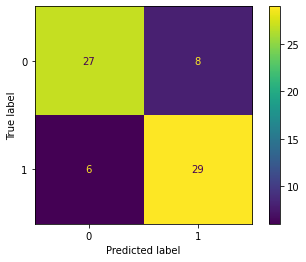

In [102]:
# Plot test confusion matrix
plot_confusion_matrix(clf_poly_svm, normalized_X_test, y_test)

In [103]:
print("Precision ", precision(cm_poly_svm))

Precision  0.7837837837837838


In [104]:
print("Recall:", recall(cm_poly_svm))

Recall: 0.8285714285714286


In [105]:
print("F1:", f1(cm_poly_svm))

F1: 0.8055555555555555


In [106]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_poly_svm == 1))
tp

29

In [107]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_poly_svm == 0))
tn

27

In [108]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_poly_svm == 1))
fp

8

In [109]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_poly_svm == 0))
fn

6

In [110]:
print("MCC:", mcc(y_test, y_pred_poly_svm))

MCC: 0.6009819973837496


# SMV - Radial Kernel

## Grid search to find the optimal parameters for SVM radial kernel

- **C**: it controls the trade-off between maximizing the margin and minimizing the classification error. It's a regularization parameter.
- **Gamma**: kernel coefficient that controls the flexibility of the SVM's decision boundary: 

        1. Small Gamma (e.g., 0.01): The decision boundary is smoother and broader. It considers more data points and is less likely to overfit.
        2. Large Gamma (e.g., 10): The decision boundary is more flexible, curving closely to individual data points. It's more likely to overfit.

In [111]:
# RBF (Radial Basis Function) kernel
param_grid = {'C': np.linspace(0.001, 100, 5),
              'gamma': np.linspace(0.001, 100, 5)}

# Create an RBF kernel SVM and perform grid search
rbf_svm = GridSearchCV(SVC(kernel='rbf'), param_grid, 
                        cv=5, scoring='accuracy', refit=True)
rbf_svm.fit(normalized_X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_C_rbf = rbf_svm.best_params_['C']
best_gamma_rbf = rbf_svm.best_params_['gamma']
best_cv_accuracy_rbf = rbf_svm.best_score_

print("Best 'C' for RBF SVM:", best_C_rbf)
print("Best gamma:", best_gamma_rbf)
print("Best cv accuracy:", best_cv_accuracy_rbf)

# Get the best model (trained with the best hyperparameters)
best_rbf_svm_model = rbf_svm.best_estimator_

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'gamma': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02])},
             scoring='accuracy')

Best 'C' for RBF SVM: 25.00075
Best gamma: 25.00075
Best cv accuracy: 0.7571428571428572


### Compute the classification metrics on the cross-validation results

In [112]:
# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_radial_svm = cross_val_predict(best_rbf_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_radial_svm = np.mean(accuracy_scores_radial_svm)
std_accuracy_radial_svm = np.std(accuracy_scores_radial_svm)
mean_precision_1_radial_svm = np.mean(precision_scores_1_radial_svm)
std_precision_1_radial_svm = np.std(precision_scores_1_radial_svm)
mean_recall_1_radial_svm = np.mean(recall_scores_1_radial_svm)
std_recall_1_radial_svm = np.std(recall_scores_1_radial_svm)
mean_f1_1_radial_svm = np.mean(f1_scores_1_radial_svm)
std_f1_1_radial_svm = np.std(f1_scores_1_radial_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_radial_svm)
print("Standard Deviation of Accuracy:", std_accuracy_radial_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_radial_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_radial_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_radial_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_radial_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_radial_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_radial_svm)

Mean Cross-Validation Accuracy: 0.7571428571428572
Standard Deviation of Accuracy: 0.050843229771577646
Mean Cross-Validation Precision - 1: 0.715845444877703
Standard Deviation of Precision - 1: 0.07297024846626532
Mean Cross-Validation Recall - 1: 0.8761904761904761
Standard Deviation of Recall - 1: 0.03809523809523809
Mean Cross-Validation F1-score - 1: 0.7848491933598318
Standard Deviation of F1-score - 1: 0.036169056550389704


In [113]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_radial_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_radial_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_radial_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_radial_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_radial_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_radial_svm)

# compute the mean and the standard deviation
mean_precision_0_radial_svm = np.mean(precision_scores_0_radial_svm)
std_precision_0_radial_svm = np.std(precision_scores_0_radial_svm)
mean_recall_0_radial_svm = np.mean(recall_scores_0_radial_svm)
std_recall_0_radial_svm = np.std(recall_scores_0_radial_svm)
mean_f1_0_radial_svm = np.mean(f1_scores_0_radial_svm)
std_f1_0_radial_svm = np.std(f1_scores_0_radial_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_radial_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_radial_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_radial_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_radial_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_radial_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_radial_svm)

Mean Cross-Validation Precision - 0: 0.8407467532467532
Standard Deviation of Precision - 0: 0.03829724028692142
Mean Cross-Validation Recall - 0: 0.6380952380952382
Standard Deviation of Recall - 0: 0.1227057021592869
Mean Cross-Validation F1-score: - 0 0.718050193050193
Standard Deviation of F1-score: - 0 0.07577828714212512


### Radial SVM on the test set 

In [114]:
def RadialSVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='rbf', C=25, gamma=25)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [115]:
y_pred_radial_svm = RadialSVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        35
           1       0.74      0.83      0.78        35

    accuracy                           0.77        70
   macro avg       0.78      0.77      0.77        70
weighted avg       0.78      0.77      0.77        70



### Study of the Radial SVM function

In [116]:
clf_radial_svm = SVC(kernel='rbf', C=25, gamma=25)

In [117]:
clf_radial_svm.fit(normalized_X_train, y_train)

SVC(C=25, gamma=25)

In [118]:
y_pred_radial_svm = clf_radial_svm.predict(normalized_X_test)

In [119]:
y_pred_radial_svm

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1], dtype=int64)

## Evaluate the model with classification metrics 

In [120]:
# Test accuracy 
accuracy_radial_svm = np.mean(y_test == y_pred_radial_svm)
print("Accuracy:", accuracy_radial_svm)

Accuracy: 0.7714285714285715


In [121]:
# build the confusion matrix
cm_radial_svm = confusion_matrix(y_test, y_pred_radial_svm)
print(cm_radial_svm)

[[25 10]
 [ 6 29]]


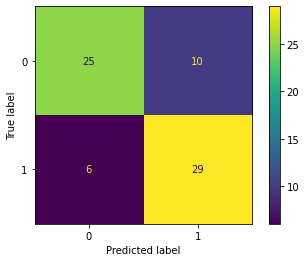

In [122]:
# Plot test confusion matrix
plot_confusion_matrix(clf_radial_svm, normalized_X_test, y_test)

In [123]:
print("Precision ", precision(cm_radial_svm))

Precision  0.7435897435897436


In [124]:
print("Recall:", recall(cm_radial_svm))

Recall: 0.8285714285714286


In [125]:
print("F1:", f1(cm_radial_svm))

F1: 0.7837837837837838


In [126]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_radial_svm == 1))
tp

29

In [127]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_radial_svm == 0))
tn

25

In [128]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_radial_svm == 1))
fp

10

In [129]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_radial_svm == 0))
fn

6

In [130]:
print("MCC:", mcc(y_test, y_pred_radial_svm))

MCC: 0.5464374431158983


# Random Forest

## Grid search to find the optimal parameters for Random Forest 

Perform a GridSearch for the mtry parameter of Random Forest.
The GridSearchCV will automatically perform cross-validation, evaluate the performance of the Random Forest with different 'max_features' values, and return the best parameter value based on the chosen scoring metric.

**NOTE 1:** the 'max_features' parameter determines the number of features randomly selected at each split point when building a tree in a random forest: a smaller 'max_features' value leads to more randomness and diversity among the trees, while a larger 'max_features' value reduces the randomness and increases the correlation between the trees.

**NOTE 2:** the Out-Of-Bag (OOB) score is a measure of a model's accuracy. It is calculated based on out-of-bag samples, which are the data points that were not used during training for each tree in the Random Forest. These out-of-bag samples are used to estimate the model's accuracy without the need for a separate validation set. The OOB score is a valuable metric because it provides an estimate of how well the Random Forest model is likely to perform on unseen data.

In [103]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest Classifier
rf = RandomForestClassifier(random_state=123, oob_score=True)

# Define the grid of parameters to search over, including max_features and n_estimators
param_grid = {
    'max_features': [15, 18, 20, 25, 30, 31, 32, 33],
    'n_estimators': [100, 200, 300, 400]  # Specify the values of n_estimators to try
}

# Create an instance of GridSearchCV and pass the Random Forest classifier, parameter grid, and desired number of cross-validation folds
grid_search_random_forest = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the Grid search object to your data
grid_search_random_forest.fit(normalized_X_train, y_train)

print("Best parameters:", grid_search_random_forest.best_params_)
print("Best cross-validation score (accuracy):", grid_search_random_forest.best_score_)
print("OOB score of best model:", grid_search_random_forest.best_estimator_.oob_score_)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True, random_state=123),
             param_grid={'max_features': [15, 18, 20, 25, 30, 31, 32, 33],
                         'n_estimators': [100, 200, 300, 400]})

Best parameters: {'max_features': 30, 'n_estimators': 300}
Best cross-validation score (accuracy): 0.7666666666666667
OOB score of best model: 0.7666666666666667


### Compute the classification metrics on the cross-validation results 

In [104]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_rf_model = grid_search_random_forest.best_estimator_  # Get the best Random Forest model with the optimal parameters

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_rf = cross_val_predict(best_rf_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_rf = np.mean(accuracy_scores_rf)
std_accuracy_rf = np.std(accuracy_scores_rf)
mean_precision_1_rf = np.mean(precision_scores_1_rf)
std_precision_1_rf = np.std(precision_scores_1_rf)
mean_recall_1_rf = np.mean(recall_scores_1_rf)
std_recall_1_rf = np.std(recall_scores_1_rf)
mean_f1_1_rf = np.mean(f1_scores_1_rf)
std_f1_1_rf = np.std(f1_scores_1_rf)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_rf)
print("Standard Deviation of Accuracy:", std_accuracy_rf)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_rf)
print("Standard Deviation of Precision - 1:", std_precision_1_rf)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_rf)
print("Standard Deviation of Recall - 1:", std_recall_1_rf)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_rf)
print("Standard Deviation of F1-score - 1:", std_f1_1_rf)

Mean Cross-Validation Accuracy: 0.7666666666666667
Standard Deviation of Accuracy: 0.05512303287042963
Mean Cross-Validation Precision - 1: 0.7585916371957562
Standard Deviation of Precision - 1: 0.07192094134297723
Mean Cross-Validation Recall - 1: 0.7904761904761906
Standard Deviation of Recall - 1: 0.04856209060564556
Mean Cross-Validation F1-score - 1: 0.7729175475687102
Standard Deviation of F1-score - 1: 0.05130736305117534


In [105]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_rf = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_rf)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_rf = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_rf)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_rf = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_rf)

# compute the mean and the standard deviation
mean_precision_0_rf = np.mean(precision_scores_0_rf)
std_precision_0_rf = np.std(precision_scores_0_rf)
mean_recall_0_rf = np.mean(recall_scores_0_rf)
std_recall_0_rf = np.std(recall_scores_0_rf)
mean_f1_0_rf = np.mean(f1_scores_0_rf)
std_f1_0_rf = np.std(f1_scores_0_rf)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_rf)
print("Standard Deviation of Precision - 0:", std_precision_0_rf)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_rf)
print("Standard Deviation of Recall - 0:", std_recall_0_rf)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_rf)
print("Standard Deviation of F1-score: - 0", std_f1_0_rf)

Mean Cross-Validation Precision - 0: 0.7797787948131198
Standard Deviation of Precision - 0: 0.04971510442456777
Mean Cross-Validation Recall - 0: 0.7428571428571429
Standard Deviation of Recall - 0: 0.08302664654363189
Mean Cross-Validation F1-score: - 0 0.7595002558417192
Standard Deviation of F1-score: - 0 0.05943938727994873


In [106]:
def RF(X_train, X_test, y_train, y_test):
    
    clf = RandomForestClassifier(max_features=30, n_estimators=300, random_state=123) # The default value for max_features in scikit-learn's RandomForestClassifier is "auto", which means that the number of features considered for splitting at each tree node is equal to the square root of the total number of features.

    clf.fit(X_train, y_train.values.ravel())

    y_pred = clf.predict(X_test)

    # Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [107]:
y_pred_rf = RF(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        35
           1       0.79      0.77      0.78        35

    accuracy                           0.79        70
   macro avg       0.79      0.79      0.79        70
weighted avg       0.79      0.79      0.79        70



### Study the Random Forest function

In [108]:
clf_rf = RandomForestClassifier(max_features=30, n_estimators=300, random_state=123)

In [109]:
clf_rf.fit(normalized_X_train, y_train)

RandomForestClassifier(max_features=30, n_estimators=300, random_state=123)

In [110]:
y_pred_rf = clf_rf.predict(normalized_X_test)

In [111]:
y_pred_rf

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1], dtype=int64)

## Evaluate the model with classification metrics 

In [112]:
# Test accuracy 
accuracy_rf = np.mean(y_test == y_pred_rf)
print("Accuracy:", accuracy_rf)

Accuracy: 0.7857142857142857


In [113]:
# build the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[28  7]
 [ 8 27]]


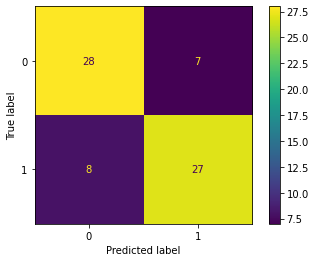

In [114]:
# Plot test confusion matrix
plot_confusion_matrix(clf_rf, normalized_X_test, y_test)

In [115]:
print("Precision ", precision(cm_rf))

Precision  0.7941176470588235


In [116]:
print("Recall:", recall(cm_rf))

Recall: 0.7714285714285715


In [117]:
print("F1:", f1(cm_rf))

F1: 0.782608695652174


In [118]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_rf == 1))
tp

27

In [119]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_rf == 0))
tn

28

In [120]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_rf == 1))
fp

7

In [121]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_rf == 0))
fn

8

In [122]:
print("MCC:", mcc(y_test, y_pred_rf))

MCC: 0.5716619504750294


# Extreme Gradient Boosting (XGBoost)

## Grid search to find the optimal parameters for XGBoost

### Boosting
In boosting, the trees are built sequentially such that each subsequent tree aims to reduce the errors of the previous tree. Each tree learns from its predecessors and updates the residual errors. Hence, the tree that grows next in the sequence will learn from an updated version of the residuals.

The base learners in boosting are weak learners in which the bias is high, and the predictive power is just a tad better than random guessing. Each of these weak learners contributes some vital information for prediction, enabling the boosting technique to produce a strong learner by effectively combining these weak learners. The final strong learner brings down both the bias and the variance.

In contrast to bagging techniques like Random Forest, in which trees are grown to their maximum extent, boosting makes use of trees with fewer splits. Such small trees, which are not very deep, are highly interpretable. Parameters like the number of trees or iterations, the rate at which the gradient boosting learns, and the depth of the tree, could be optimally selected through validation techniques like k-fold cross validation. Having a large number of trees might lead to overfitting. So, it is necessary to carefully choose the stopping criteria for boosting.

XGBoost offers a wide range of **hyperparameters** that you can fine-tune to optimize the model's performance. Here are some of the most commonly tuned hyperparameters in XGBoost:

1. **Learning Rate (eta)**:
    - Parameter name: eta
    - Description: Learning rate controls the step size at each iteration          while moving toward a minimum of a loss function. Lower values make the      optimization more robust but require more boosting rounds
    
    
2. **Maximum Depth of Trees (max_depth):**
    - Parameter name: max_depth
    - Description: It specifies the maximum depth of the individual trees. Deeper trees can model more complex relationships but are more prone to overfitting.
    
    
3. **Number of Trees (n_estimators):**
    - Parameter name: n_estimators
    - Description: It determines the number of boosting rounds (trees) to train. More rounds can improve performance, but you should be cautious of overfitting.
    
    
4. **Column Subsampling (colsample_bytree and colsample_bylevel):**
    - Parameter name: colsample_bytree and colsample_bylevel
    - Description: These parameters control the fraction of features (columns) to be randomly sampled for building each tree and each level of a tree, respectively.
    
    
5. **Regularization Parameter (gamma):**
    - Parameter names: gamma
    - Description: used for controlling regularization. The gamma hyperparameter is related to the minimum loss reduction required to make a further partition on a leaf node of the tree. (default value = 0 --> no regularization is applied and the tree can grow as deep as necessary to fit the training data)

In [123]:
import xgboost as xgb

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [5, 6, 8, 9],
    'n_estimators': [100, 200, 300],
    #'colsample_bytree': [0.5, 0.75, 1.0],
    #'gamma': [0, 0.1, 0.2] 
}

# Create an instance of the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic')

# Create the GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search_xgb.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_learning_rate = grid_search_xgb.best_params_['learning_rate']
best_max_depth = grid_search_xgb.best_params_['max_depth']
best_n_estimators = grid_search_xgb.best_params_['n_estimators']
#best_colsample_bytree = grid_search_xgb.best_params_['colsample_bytree']

best_accuracy = grid_search_xgb.best_score_

print("Best Learning Rate:", best_learning_rate)
print("Best Max Depth:", best_max_depth)
print("Best Number of Trees:", best_n_estimators)
#print("Best Column Subsampling:", best_colsample_bytree)
print("Best Accuracy:", best_accuracy)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

Best Learning Rate: 0.01
Best Max Depth: 5
Best Number of Trees: 100
Best Accuracy: 0.780952380952381


### Compute the classification metrics on the cross-validation results 

In [124]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_xgb_model = grid_search_xgb.best_estimator_  # Get the best xgb model with the optimal parameters

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_xgb = cross_val_predict(best_xgb_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_xgb = np.mean(accuracy_scores_xgb)
std_accuracy_xgb = np.std(accuracy_scores_xgb)
mean_precision_1_xgb = np.mean(precision_scores_1_xgb)
std_precision_1_xgb = np.std(precision_scores_1_xgb)
mean_recall_1_xgb = np.mean(recall_scores_1_xgb)
std_recall_1_xgb = np.std(recall_scores_1_xgb)
mean_f1_1_xgb = np.mean(f1_scores_1_xgb)
std_f1_1_xgb = np.std(f1_scores_1_xgb)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_xgb)
print("Standard Deviation of Accuracy:", std_accuracy_xgb)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_xgb)
print("Standard Deviation of Precision - 1:", std_precision_1_xgb)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_xgb)
print("Standard Deviation of Recall - 1:", std_recall_1_xgb)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_xgb)
print("Standard Deviation of F1-score - 1:", std_f1_1_xgb)

Mean Cross-Validation Accuracy: 0.780952380952381
Standard Deviation of Accuracy: 0.05302632726504781
Mean Cross-Validation Precision - 1: 0.7573333333333333
Standard Deviation of Precision - 1: 0.07294290004288743
Mean Cross-Validation Recall - 1: 0.8380952380952381
Standard Deviation of Recall - 1: 0.023328473740792145
Mean Cross-Validation F1-score - 1: 0.794353717450218
Standard Deviation of F1-score - 1: 0.0451337664135024


In [125]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_xgb = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_xgb)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_xgb = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_xgb)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_xgb = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_xgb)

# compute the mean and the standard deviation
mean_precision_0_xgb = np.mean(precision_scores_0_xgb)
std_precision_0_xgb = np.std(precision_scores_0_xgb)
mean_recall_0_xgb = np.mean(recall_scores_0_xgb)
std_recall_0_xgb = np.std(recall_scores_0_xgb)
mean_f1_0_xgb = np.mean(f1_scores_0_xgb)
std_f1_0_xgb = np.std(f1_scores_0_xgb)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_xgb)
print("Standard Deviation of Precision - 0:", std_precision_0_xgb)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_xgb)
print("Standard Deviation of Recall - 0:", std_recall_0_xgb)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_xgb)
print("Standard Deviation of F1-score: - 0", std_f1_0_xgb)

Mean Cross-Validation Precision - 0: 0.8152109328579916
Standard Deviation of Precision - 0: 0.03330202106449305
Mean Cross-Validation Recall - 0: 0.7238095238095238
Standard Deviation of Recall - 0: 0.09233675918888248
Mean Cross-Validation F1-score: - 0 0.7651382481247841
Standard Deviation of F1-score: - 0 0.06218195307675309


In [126]:
def XGBoost(X_train, X_test, y_train, y_test):
    
    clf = xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.01, n_estimators=100, max_depth=5, random_state=123) 

    clf.fit(X_train, y_train.values.ravel())

    y_pred = clf.predict(X_test)

    # Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [127]:
y_pred_xgb = XGBoost(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76        35
           1       0.76      0.74      0.75        35

    accuracy                           0.76        70
   macro avg       0.76      0.76      0.76        70
weighted avg       0.76      0.76      0.76        70



### Study the eXtreme Gradient Boosting function

In [128]:
clf_xgb = xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.01, n_estimators=100, max_depth=5, random_state=123) 

In [129]:
clf_xgb.fit(normalized_X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [130]:
y_pred_xgb = clf_xgb.predict(normalized_X_test)

## Evaluate the model with classification metrics 

In [131]:
# Test accuracy 
accuracy_xgb = np.mean(y_test == y_pred_xgb)
print("Accuracy:", accuracy_xgb)

Accuracy: 0.7571428571428571


In [132]:
# build the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)

[[27  8]
 [ 9 26]]


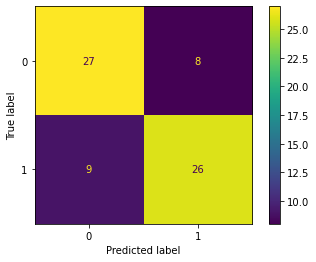

In [133]:
# Plot test confusion matrix
plot_confusion_matrix(clf_xgb, normalized_X_test, y_test)

In [134]:
print("Precision ", precision(cm_xgb))

Precision  0.7647058823529411


In [135]:
print("Recall:", recall(cm_xgb))

Recall: 0.7428571428571429


In [136]:
print("F1:", f1(cm_xgb))

F1: 0.7536231884057971


In [137]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_xgb == 1))
tp

26

In [138]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_xgb == 0))
tn

27

In [139]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_xgb == 1))
fp

8

In [140]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_xgb == 0))
fn

9

In [141]:
print("MCC:", mcc(y_test, y_pred_xgb))

MCC: 0.5144957554275265
